# Bài tập cuối kỳ môn Machine Learning: Dự đoán xem một nhân viên sẽ nghỉ việc hay không
- Đồ án được hoàn thành bởi
    - La Nguyễn Quốc Thịnh - 521H0513
    - Trần Quốc Bảo - 521H0494
    - Nguyễn Văn Khoa - 521H0251


## Thư viện

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

## Define các hàm để in ra sự so sánh (nếu có)

In [3]:
title_1 = "Non-hyperparameter"
title_2 = "Hyperparameter"

def visualize_metrics(metrics):

    # List of classifiers and metrics
    classifiers = list(metrics.keys())
    metric_names = list(metrics[classifiers[0]].keys())


    bar_width = 0.15  # Set the width of the bars
    padding = 0.05  # Adjust the padding value as desired

    # Set the positions of the x-axis ticks
    x_pos = np.arange(len(classifiers))

    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the bar chart size

    # Plot each metric as a group of bars
    for i, metric in enumerate(metric_names):
        metric_values = [metrics[classifier][metric] for classifier in classifiers]
        bar_positions = x_pos + ((bar_width + padding) * i)
        ax.bar(bar_positions, metric_values, bar_width, label=metric)

    # Set the labels and title
    ax.set_xlabel('Classifier')
    ax.set_ylabel('Score')
    ax.set_title('Comparison of Metrics')
    ax.set_xticks(x_pos + (((bar_width + padding) * (len(metric_names) - 1)) / 2))
    ax.set_xticklabels(classifiers)
    ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# def compare_metrics(training_metrics, testing_metrics):
#     metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

#     x = np.arange(len(metrics))
#     width = 0.35

#     fig, ax = plt.subplots(figsize=(10, 6))
#     training_bars = ax.bar(x - width/2, training_metrics, width, label='Training Set', color='skyblue')
#     testing_bars = ax.bar(x + width/2, testing_metrics, width, label='Testing Set', color='lightgreen')

#     ax.set_ylabel('Metrics', fontsize=14)
#     ax.set_title('Metrics Comparison', fontsize=16, fontweight='bold')
#     ax.set_xticks(x)
#     ax.set_xticklabels(metrics, fontsize=12)
#     ax.legend(fontsize=12)

#     for bar in training_bars:
#         height = bar.get_height()
#         ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
#                     textcoords="offset points", ha='center', va='bottom', fontsize=11)

#     for bar in testing_bars:
#         height = bar.get_height()
#         ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
#                     textcoords="offset points", ha='center', va='bottom', fontsize=11)

#     plt.ylim(0, 1.1)
#     plt.yticks(fontsize=11)
#     plt.grid(axis='y', linestyle='--')

#     fig.tight_layout()
#     plt.show()
    
def compare_metrics(training_metrics, testing_metrics, title):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

    x = np.arange(len(metrics))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    training_bars = ax.bar(x - width/2, training_metrics, width, label='Training Set', color='skyblue')
    testing_bars = ax.bar(x + width/2, testing_metrics, width, label='Testing Set', color='lightgreen')

    ax.set_ylabel('Metrics', fontsize=14)
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics, fontsize=12)
    ax.legend(fontsize=12)

    for bar in training_bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom', fontsize=11)

    for bar in testing_bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom', fontsize=11)

    plt.ylim(0, 1.1)
    plt.yticks(fontsize=11)
    plt.grid(axis='y', linestyle='--')

    fig.tight_layout()
    plt.show()
    
    
def compute_metric_difference(train_metrics, test_metrics):
    """
    Tính toán độ chênh lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra.

    Arguments:
    train_metrics (list): Danh sách chứa các giá trị metrics trên tập huấn luyện.
    test_metrics (list): Danh sách chứa các giá trị metrics trên tập kiểm tra.
    """

    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

    print("Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: ")
    for i, metric_name in enumerate(metrics):
        train_value = train_metrics[i]
        test_value = test_metrics[i]
        difference = round(train_value - test_value, 4)
        print(f"{metric_name}: {difference}")    


def print_metrics(accuracy, precision, recall, f1):
        print("Accuracy: {:.4f}".format(accuracy))
        print("Precision: {:.4f}".format(precision))
        print("Recall: {:.4f}".format(recall))
        print("F1-Score: {:.4f}".format(f1))

def plot_loss_history(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_accuracy_history(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def plot_accuracy_history_comparision(history_before, history_after):
    plt.figure(figsize=(12, 5))

    # Plot for history_before
    plt.subplot(1, 2, 1)
    plt.plot(history_before.history['accuracy'], label='Training Accuracy (Before)')
    plt.plot(history_before.history['val_accuracy'], label='Validation Accuracy (Before)')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy History Before')

    # Plot for history_after
    plt.subplot(1, 2, 2)
    plt.plot(history_after.history['accuracy'], label='Training Accuracy (After)')
    plt.plot(history_after.history['val_accuracy'], label='Validation Accuracy (After)')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy History After')

    # Adjust layout
    plt.tight_layout()

    plt.show()
    
def plot_loss_history_comparision(history_before, history_after):
    plt.figure(figsize=(12, 5))

    # Plot for history_before
    plt.subplot(1, 2, 1)
    plt.plot(history_before.history['loss'], label='Training Loss (Before)')
    plt.plot(history_before.history['val_loss'], label='Validation Loss (Before)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss History Before')

    # Plot for history_after
    plt.subplot(1, 2, 2)
    plt.plot(history_after.history['loss'], label='Training Loss (After)')
    plt.plot(history_after.history['val_loss'], label='Validation Loss (After)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss History After')

    # Adjust layout
    plt.tight_layout()

    plt.show()



## Phần 1: Data Preprocessing + Data Exploration

### Data cleaning

In [4]:
df = pd.DataFrame(pd.read_csv('Employee.csv'))
df

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34    Male          No   
1     Bachelors         2013       Pune            1   28  Female          No   
2     Bachelors         2014  New Delhi            3   38  Female          No   
3       Masters         2016  Bangalore            3   27    Male          No   
4       Masters         2017       Pune            3   24    Male         Yes   
...         ...          ...        ...          ...  ...     ...         ...   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4649    Masters         2013       Pune            2   37    Male          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4651  Bachelors         2012  Bangalore            3   30    Male         Yes   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes   

      ExperienceInCurrentDomain  LeaveOrNot  
0                             0           0  
1                             3           1  
2                             2           0  
3                             5           1  
4                             2           1  
...                         ...         ...  
4648                          4           0  
4649                          2           1  
4650                          5           1  
4651                          2           0  
4652                          4           0  

[4653 rows x 9 columns]

In [5]:
df.isna().sum()

# Không có giá trị null trong tập dữ liệu nên không cần xử lý "Missing Values"

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [6]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

# Xử lý dữ liệu trùng lặp.

### Data handling Categorical và Transformation


In [7]:
df['Education'].unique()


array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [8]:
df['City'].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

In [9]:
df['PaymentTier'].unique()

array([3, 1, 2], dtype=int64)

In [10]:
# Có 3 features thuộc dạng categorical nên cần phải chuyển đổi

df_dummies = pd.get_dummies(df, columns=['JoiningYear', 'Education', 'City', 'PaymentTier', 'EverBenched', 'Gender'])
df_dummies

Age  ExperienceInCurrentDomain  LeaveOrNot  JoiningYear_2012  \
0      34                          0           0             False   
1      28                          3           1             False   
2      38                          2           0             False   
3      27                          5           1             False   
4      24                          2           1             False   
...   ...                        ...         ...               ...   
4645   31                          2           0             False   
4647   30                          2           0             False   
4649   37                          2           1             False   
4650   27                          5           1             False   
4651   30                          2           0              True   

      JoiningYear_2013  JoiningYear_2014  JoiningYear_2015  JoiningYear_2016  \
0                False             False             False             False   
1                 True             False             False             False   
2                False              True             False             False   
3                False             False             False              True   
4                False             False             False             False   
...                ...               ...               ...               ...   
4645             False             False             False             False   
4647             False             False             False              True   
4649              True             False             False             False   
4650             False             False             False             False   
4651             False             False             False             False   

      JoiningYear_2017  JoiningYear_2018  ...  City_Bangalore  City_New Delhi  \
0                 True             False  ...            True           False   
1                False             False  ...           False           False   
2                False             False  ...           False            True   
3                False             False  ...            True           False   
4                 True             False  ...           False           False   
...                ...               ...  ...             ...             ...   
4645              True             False  ...           False           False   
4647             False             False  ...           False           False   
4649             False             False  ...           False           False   
4650             False              True  ...           False            True   
4651             False             False  ...            True           False   

      City_Pune  PaymentTier_1  PaymentTier_2  PaymentTier_3  EverBenched_No  \
0         False          False          False           True            True   
1          True           True          False          False            True   
2         False          False          False           True            True   
3         False          False          False           True            True   
4          True          False          False           True           False   
...         ...            ...            ...            ...             ...   
4645       True          False           True          False            True   
4647       True          False          False           True            True   
4649       True          False           True          False            True   
4650      False          False          False           True            True   
4651      False          False          False           True           False   

      EverBenched_Yes  Gender_Female  Gender_Male  
0               False          False         True  
1               False           True        False  
2               False           True        False  
3               False          False         True  
4         

In [11]:
df_dummies.dtypes

Age                          int64
ExperienceInCurrentDomain    int64
LeaveOrNot                   int64
JoiningYear_2012              bool
JoiningYear_2013              bool
JoiningYear_2014              bool
JoiningYear_2015              bool
JoiningYear_2016              bool
JoiningYear_2017              bool
JoiningYear_2018              bool
Education_Bachelors           bool
Education_Masters             bool
Education_PHD                 bool
City_Bangalore                bool
City_New Delhi                bool
City_Pune                     bool
PaymentTier_1                 bool
PaymentTier_2                 bool
PaymentTier_3                 bool
EverBenched_No                bool
EverBenched_Yes               bool
Gender_Female                 bool
Gender_Male                   bool
dtype: object

In [12]:
le = LabelEncoder()

name = list(df_dummies.columns)
type = df_dummies.dtypes

for i in range(len(type)):
    if type[i] == 'object':
        le.fit_transform(df_dummies[name[i]])
        df_dummies[name[i]] = le.transform(df_dummies[name[i]])

df_dummies

C:\Users\Thinh\AppData\Local\Temp\ipykernel_17512\3446361408.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if type[i] == 'object':


Age  ExperienceInCurrentDomain  LeaveOrNot  JoiningYear_2012  \
0      34                          0           0             False   
1      28                          3           1             False   
2      38                          2           0             False   
3      27                          5           1             False   
4      24                          2           1             False   
...   ...                        ...         ...               ...   
4645   31                          2           0             False   
4647   30                          2           0             False   
4649   37                          2           1             False   
4650   27                          5           1             False   
4651   30                          2           0              True   

      JoiningYear_2013  JoiningYear_2014  JoiningYear_2015  JoiningYear_2016  \
0                False             False             False             False   
1                 True             False             False             False   
2                False              True             False             False   
3                False             False             False              True   
4                False             False             False             False   
...                ...               ...               ...               ...   
4645             False             False             False             False   
4647             False             False             False              True   
4649              True             False             False             False   
4650             False             False             False             False   
4651             False             False             False             False   

      JoiningYear_2017  JoiningYear_2018  ...  City_Bangalore  City_New Delhi  \
0                 True             False  ...            True           False   
1                False             False  ...           False           False   
2                False             False  ...           False            True   
3                False             False  ...            True           False   
4                 True             False  ...           False           False   
...                ...               ...  ...             ...             ...   
4645              True             False  ...           False           False   
4647             False             False  ...           False           False   
4649             False             False  ...           False           False   
4650             False              True  ...           False            True   
4651             False             False  ...            True           False   

      City_Pune  PaymentTier_1  PaymentTier_2  PaymentTier_3  EverBenched_No  \
0         False          False          False           True            True   
1          True           True          False          False            True   
2         False          False          False           True            True   
3         False          False          False           True            True   
4          True          False          False           True           False   
...         ...            ...            ...            ...             ...   
4645       True          False           True          False            True   
4647       True          False          False           True            True   
4649       True          False           True          False            True   
4650      False          False          False           True            True   
4651      False          False          False           True           False   

      EverBenched_Yes  Gender_Female  Gender_Male  
0               False          False         True  
1               False           True        False  
2               False           True        False  
3               False          False         True  
4         

### Data Exploration

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'ExperienceInCurrentDomain'}>],
       [<Axes: title={'center': 'LeaveOrNot'}>, <Axes: >]], dtype=object)

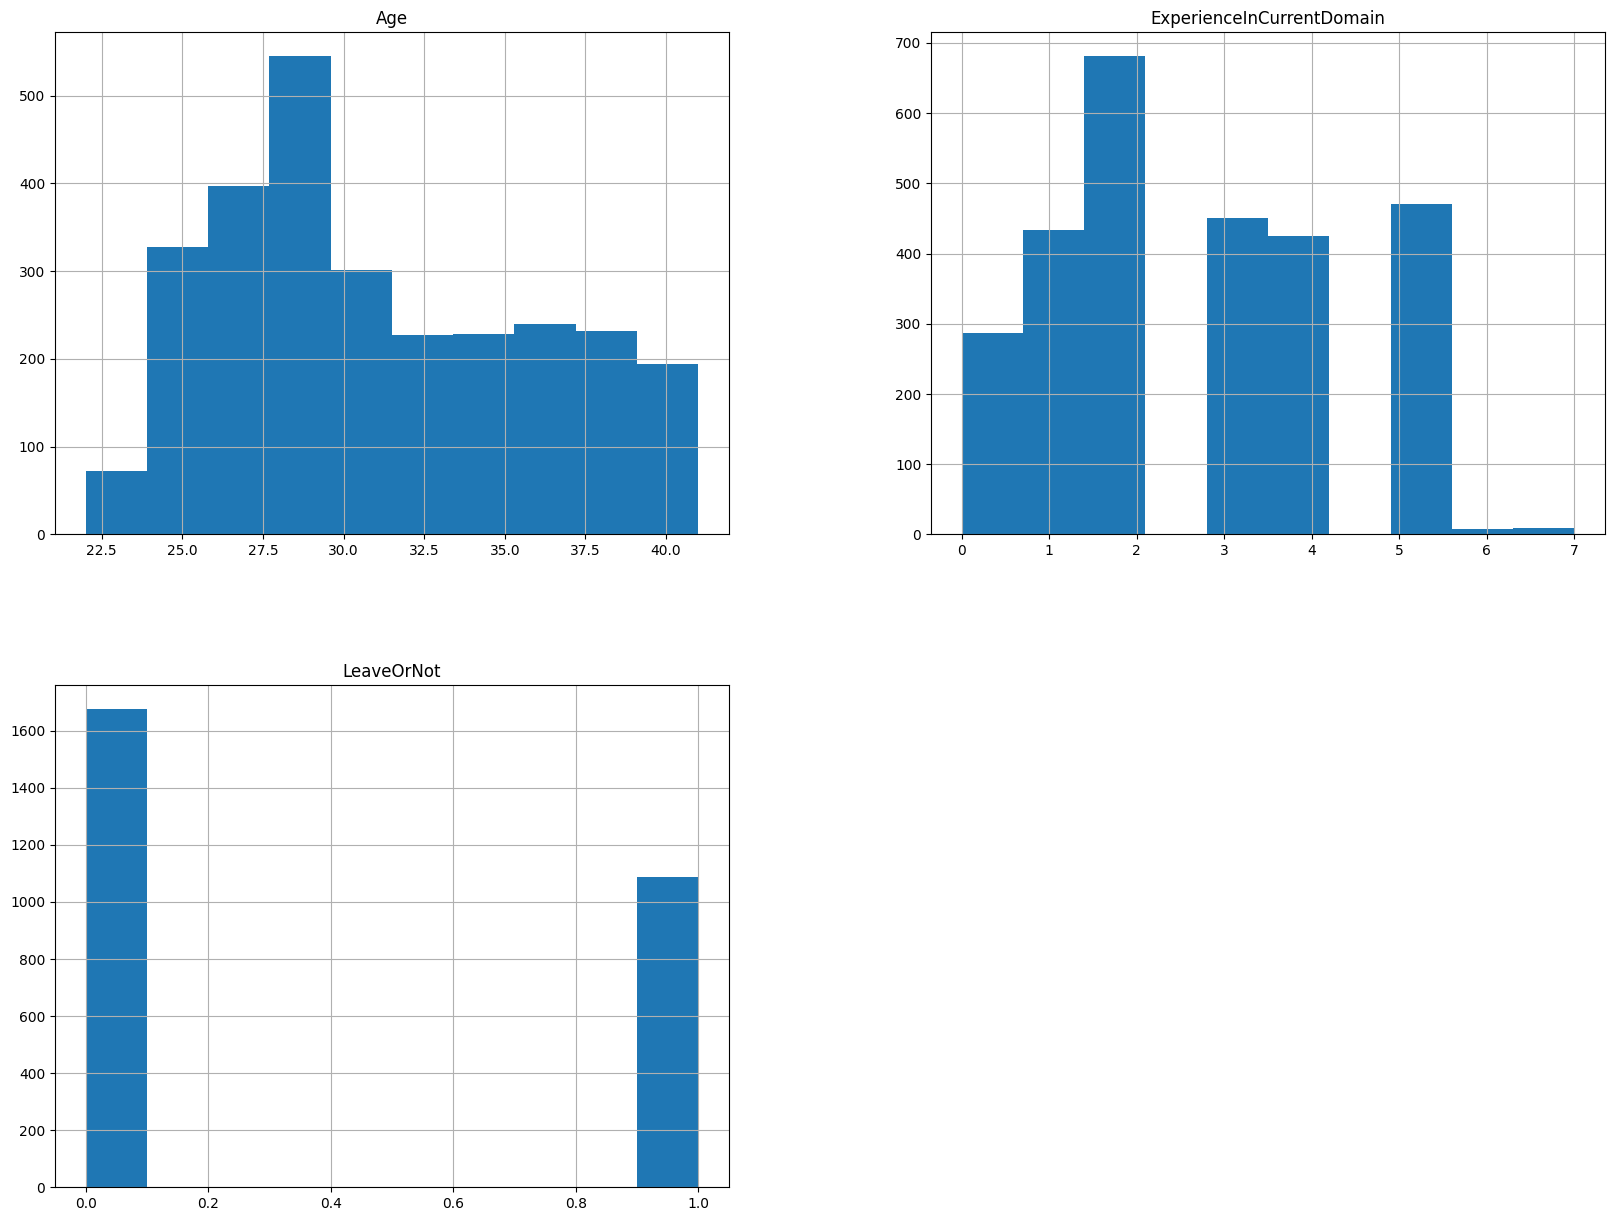

In [13]:
df_dummies.hist(figsize=(20, 15))

C:\Users\Thinh\AppData\Local\Temp\ipykernel_17512\385756184.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
C:\Users\Thinh\AppData\Local\Temp\ipykernel_17512\385756184.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
C:\Users\Thinh\AppData\Local\Temp\ipykernel_17512\385756184.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

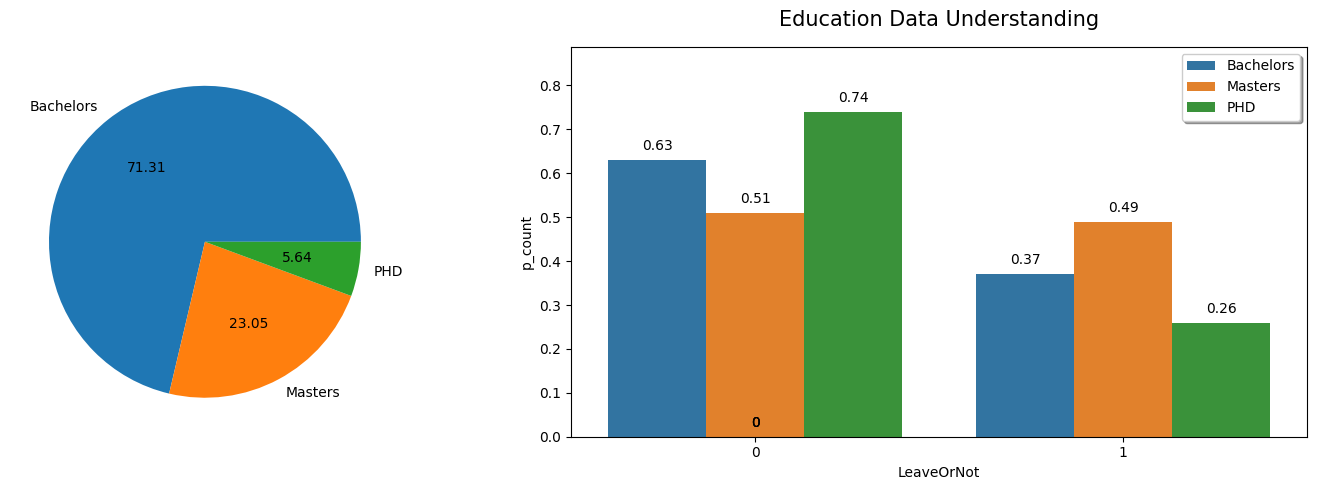

In [14]:
# xem tỉ lê số lượng nhân viên bỏ việc dựa trên trình độ học vấn

data1=df.Education.value_counts().reset_index()
data2=df.groupby(['Education','LeaveOrNot']).size().reset_index().rename(columns={0:'count'})
data2_=[]
for x in data2.Education.unique():
    msg=data2[data2.Education==x]
    msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
    data2_.append(msg)
data2=pd.concat(data2_)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].pie(data1['count'], labels=data1['Education'], autopct='%.2f')
ax[1].set_title('Education Data Understanding', fontsize=15, pad=15)

# Bar plot
bar_plot = sns.barplot(data=data2, x='LeaveOrNot', y='p_count', hue='Education', ax=ax[1])

# Show the annotate on the top of barplot
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax[1].legend(shadow=True)
ax[1].set_ylim(ymin=0, ymax=data2['p_count'].max() + (data2['p_count'].max()*0.2))

plt.tight_layout()
plt.show()

C:\Users\Thinh\AppData\Local\Temp\ipykernel_17512\3541328264.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
C:\Users\Thinh\AppData\Local\Temp\ipykernel_17512\3541328264.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
C:\Users\Thinh\AppData\Local\Temp\ipykernel_17512\3541328264.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

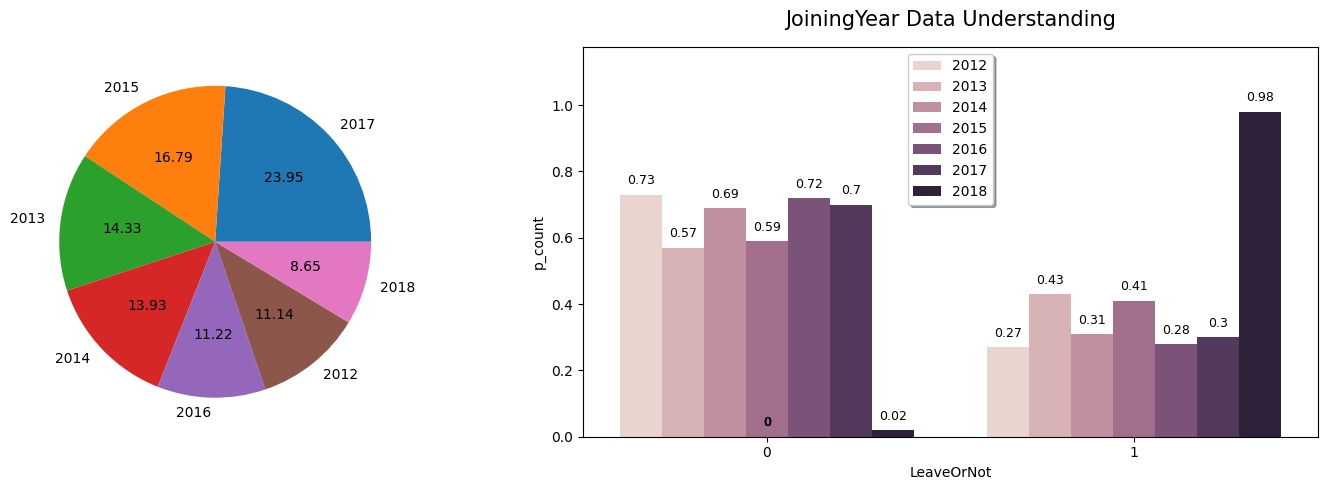

In [15]:
# xem tỉ lê số lượng nhân viên bỏ việc dựa trên năm ứng tuyển

data1=df.JoiningYear.value_counts().reset_index()
data2=df.groupby(['JoiningYear','LeaveOrNot']).size().reset_index().rename(columns={0:'count'})
data2_=[]
for x in data2.JoiningYear.unique():
    msg=data2[data2.JoiningYear==x]
    msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
    data2_.append(msg)
data2=pd.concat(data2_)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].pie(data1['count'], labels=data1['JoiningYear'], autopct='%.2f')
ax[1].set_title('JoiningYear Data Understanding', fontsize=15, pad=15)

# Bar plot
bar_plot = sns.barplot(data=data2, x='LeaveOrNot', y='p_count', hue='JoiningYear', ax=ax[1])

# Show the annotate on the top of barplot
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9)

ax[1].legend(shadow=True)
ax[1].set_ylim(ymin=0, ymax=data2['p_count'].max() + (data2['p_count'].max()*0.2))

plt.tight_layout()
plt.show()

C:\Users\Thinh\AppData\Local\Temp\ipykernel_17512\628811176.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
C:\Users\Thinh\AppData\Local\Temp\ipykernel_17512\628811176.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
C:\Users\Thinh\AppData\Local\Temp\ipykernel_17512\628811176.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

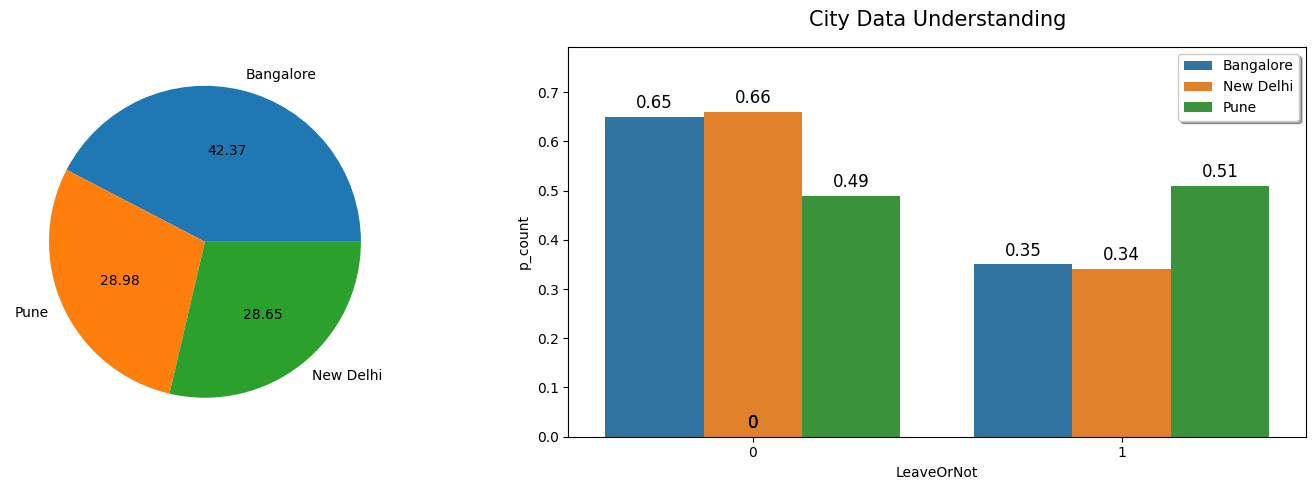

In [16]:
# xem tỉ lê số lượng nhân viên bỏ việc dựa trên thành phố sinh sống

data1=df.City.value_counts().reset_index()
data2=df.groupby(['City','LeaveOrNot']).size().reset_index().rename(columns={0:'count'})
data2_=[]
for x in data2.City.unique():
    msg=data2[data2.City==x]
    msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
    data2_.append(msg)
data2=pd.concat(data2_)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].pie(data1['count'], labels=data1['City'], autopct='%.2f')
ax[1].set_title('City Data Understanding', fontsize=15, pad=15)

# Bar plot
bar_plot = sns.barplot(data=data2, x='LeaveOrNot', y='p_count', hue='City', ax=ax[1])

# Show the annotate on the top of barplot
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

ax[1].legend(shadow=True)
ax[1].set_ylim(ymin=0, ymax=data2['p_count'].max() + (data2['p_count'].max()*0.2))

plt.tight_layout()
plt.show()

C:\Users\Thinh\AppData\Local\Temp\ipykernel_17512\1634165482.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
C:\Users\Thinh\AppData\Local\Temp\ipykernel_17512\1634165482.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)


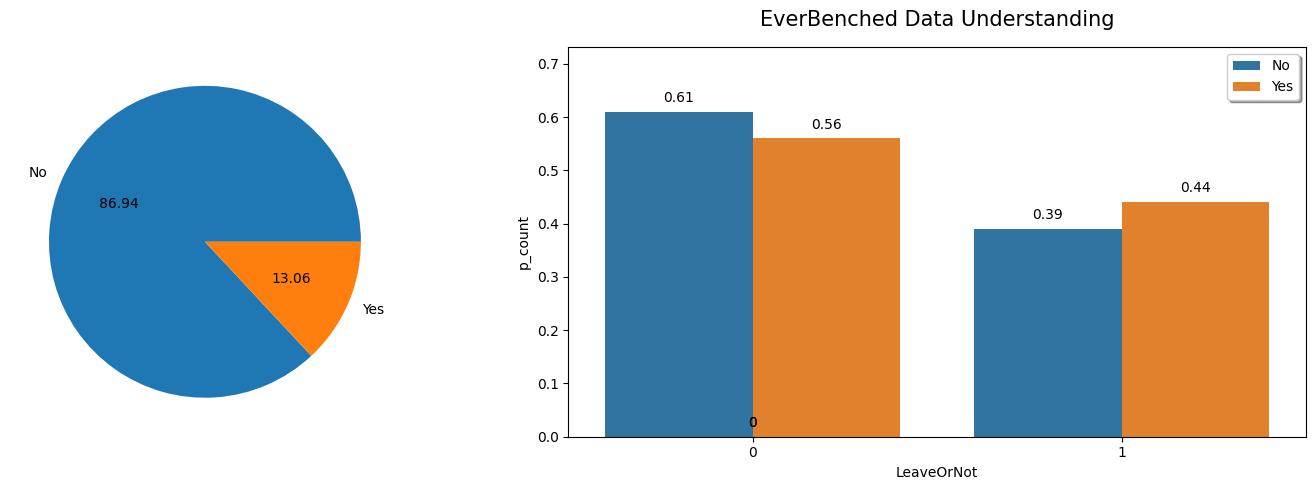

In [17]:
# xem tỉ lê số lượng nhân viên bỏ việc dựa trên lịch sử thăng cấp

data1=df.EverBenched.value_counts().reset_index()
data2=df.groupby(['EverBenched','LeaveOrNot']).size().reset_index().rename(columns={0:'count'})
data2_=[]
for x in data2.EverBenched.unique():
    msg=data2[data2.EverBenched==x]
    msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
    data2_.append(msg)
data2=pd.concat(data2_)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].pie(data1['count'], labels=data1['EverBenched'], autopct='%.2f')
ax[1].set_title('EverBenched Data Understanding', fontsize=15, pad=15)

# Bar plot
bar_plot = sns.barplot(data=data2, x='LeaveOrNot', y='p_count', hue='EverBenched', ax=ax[1])

# Show the annotate on the top of barplot
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax[1].legend(shadow=True)
ax[1].set_ylim(ymin=0, ymax=data2['p_count'].max() + (data2['p_count'].max()*0.2))

plt.tight_layout()
plt.show()

C:\Users\Thinh\AppData\Local\Temp\ipykernel_17512\268465423.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
C:\Users\Thinh\AppData\Local\Temp\ipykernel_17512\268465423.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)


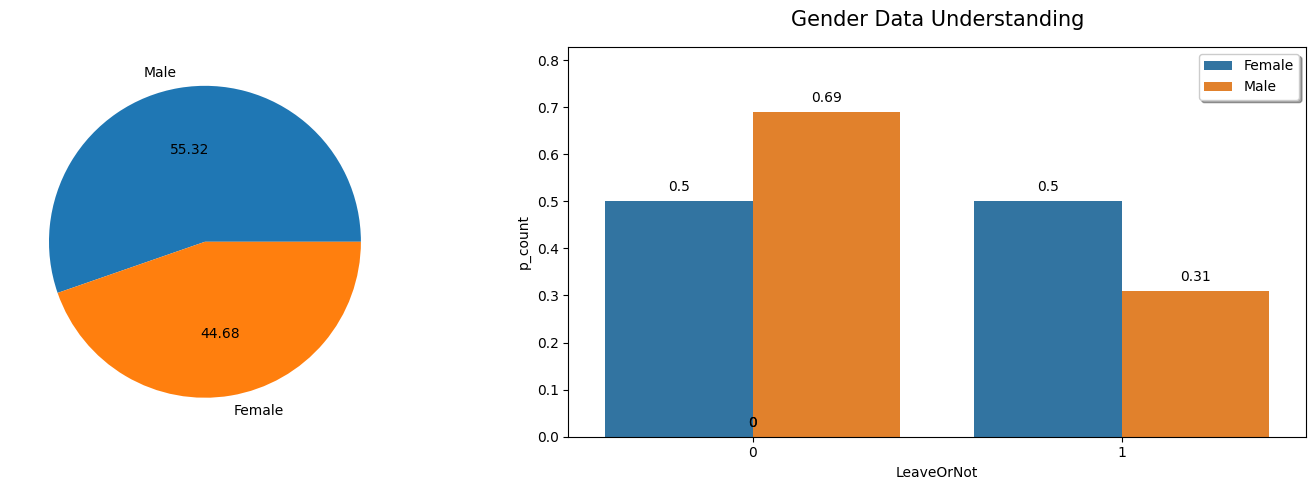

In [18]:
# xem tỉ lê số lượng nhân viên bỏ việc dựa trên giới tính

data1=df.Gender.value_counts().reset_index()
data2=df.groupby(['Gender','LeaveOrNot']).size().reset_index().rename(columns={0:'count'})
data2_=[]
for x in data2.Gender.unique():
    msg=data2[data2.Gender==x]
    msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
    data2_.append(msg)
data2=pd.concat(data2_)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].pie(data1['count'], labels=data1['Gender'], autopct='%.2f')
ax[1].set_title('Gender Data Understanding', fontsize=15, pad=15)

# Bar plot
bar_plot = sns.barplot(data=data2, x='LeaveOrNot', y='p_count', hue='Gender', ax=ax[1])

# Show the annotate on the top of barplot
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax[1].legend(shadow=True)
ax[1].set_ylim(ymin=0, ymax=data2['p_count'].max() + (data2['p_count'].max()*0.2))

plt.tight_layout()
plt.show()

### Sử dụng Pearson Corelation để xem điểm tương quang giữa các Feature

<Axes: >

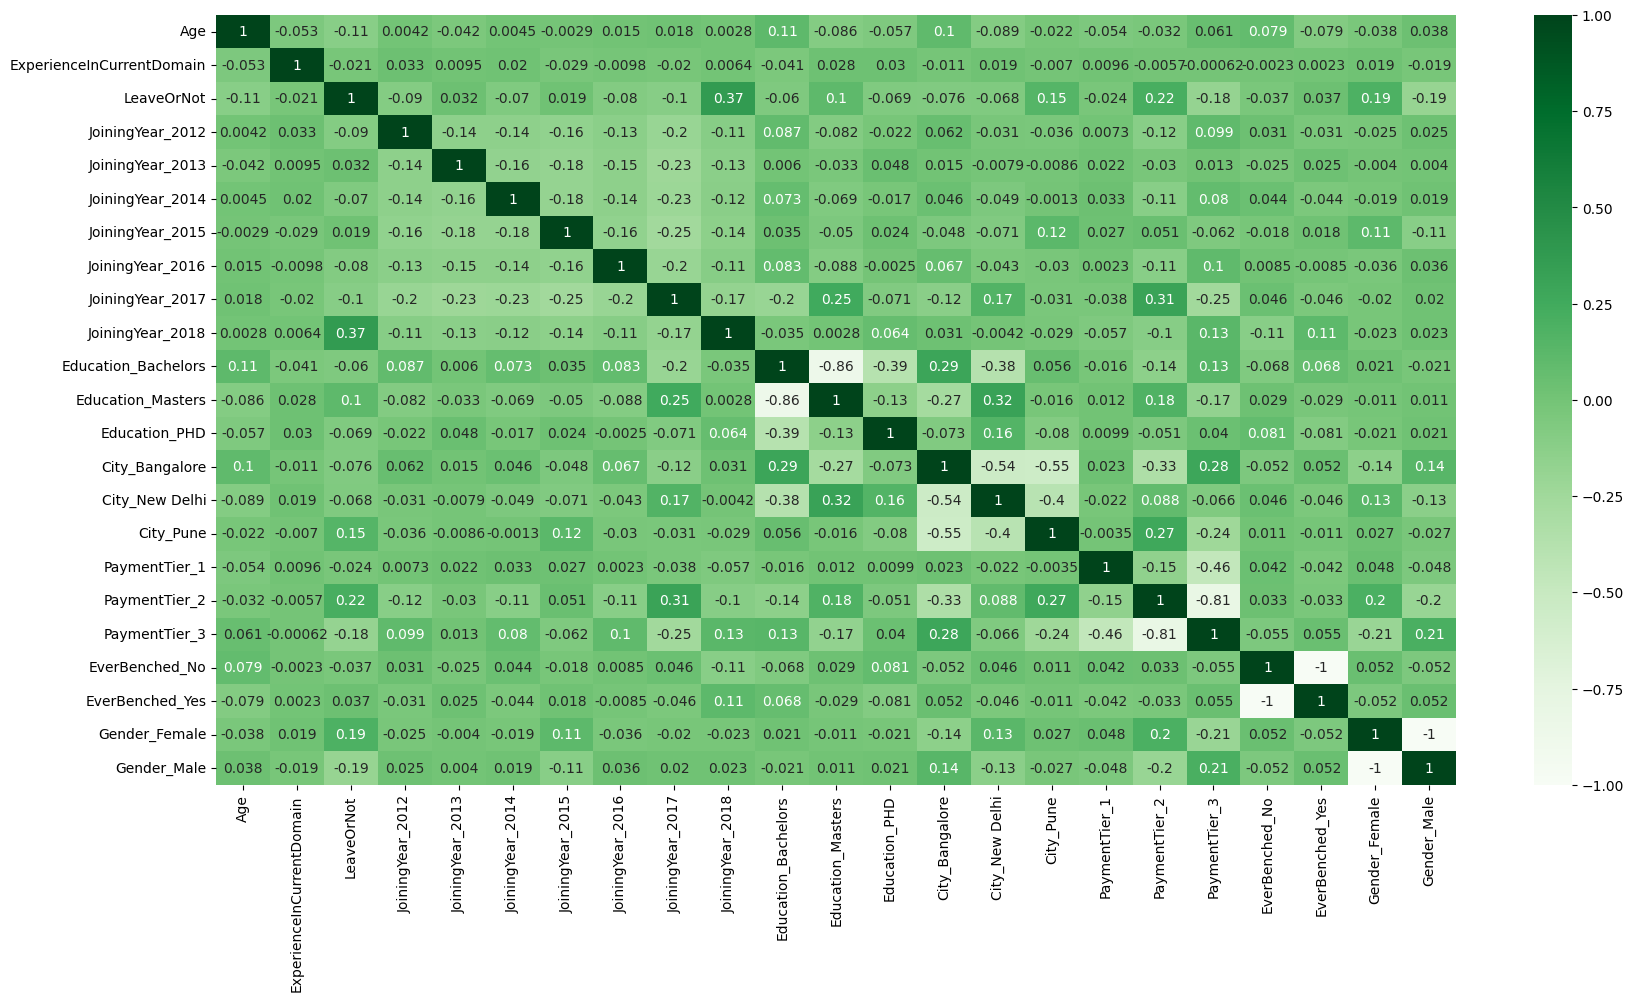

In [19]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_dummies.corr(), annot=True, cmap="Greens")

In [20]:
# Drop các Feature có corr() > 0.5
corr_matrix = df_dummies.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
to_drop.remove("LeaveOrNot") if "LeaveOrNot" in to_drop else None
df_dummies.drop(to_drop, axis=1, inplace=True)

<Axes: >

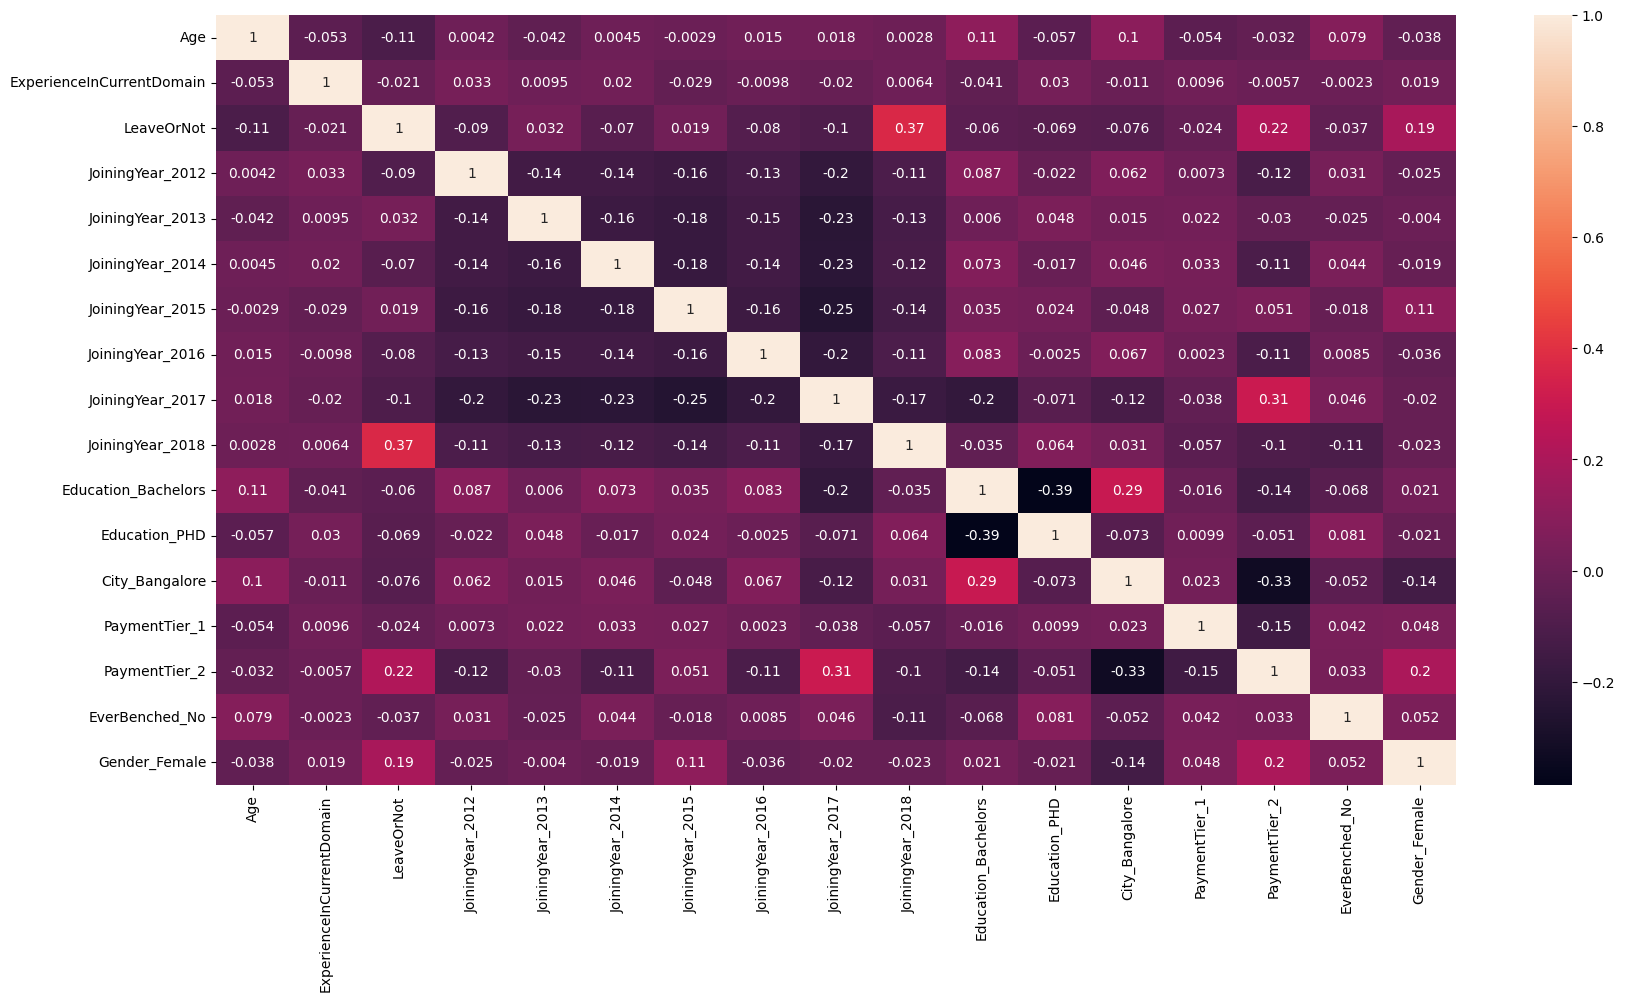

In [21]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_dummies.corr(), annot=True)

- Sau khi thực hiện Feature selection có thể nhận ra các yếu tố chính quyết định một nhân viên có nghỉ việc hay không chính là độ tuổi, năm bắt đầu đi làm và mức lương họ được trả cũng như là lịch sử thăng bậc được
- Điều này có thể nhận thấy khi các điểm tương quan giữa các yếu tố trên so với kết quả 'LeaveOrNot' đều nằm dao động từ 0.035 trở lên. Trong thực tế cũng có thể nhận thấy được yếu tốt lớn nhất ảnh hưởng đến việc một người có nghỉ việc hay không sẽ phục thuộc vào mức lương cũng như là độ tuổi

#### Regularization

In [22]:
X = df_dummies.drop('LeaveOrNot', axis=1)
y = df_dummies['LeaveOrNot']

In [23]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.fit_transform(X)

In [24]:
X_scaled


array([[ 0.59652788, -1.64213199, -0.35412874, ..., -0.50970526,
         0.38759371, -0.89873103],
       [-0.57811215,  0.22085316, -0.35412874, ..., -0.50970526,
         0.38759371,  1.11267995],
       [ 1.37962124, -0.40014189, -0.35412874, ..., -0.50970526,
         0.38759371,  1.11267995],
       ...,
       [ 1.1838479 , -0.40014189, -0.35412874, ...,  1.96191814,
         0.38759371, -0.89873103],
       [-0.77388549,  1.46284326, -0.35412874, ..., -0.50970526,
         0.38759371, -0.89873103],
       [-0.18656548, -0.40014189,  2.82383179, ..., -0.50970526,
        -2.58002126, -0.89873103]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=5, test_size=0.3)

## Phần 2: Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learing

### Các mô hình học máy cơ bản

#### KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train)
y_test_pred = knn_clf.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_test_pred)
knn_precision = precision_score(y_test, y_test_pred)
knn_recall = recall_score(y_test, y_test_pred)
knn_f1 = f1_score(y_test, y_test_pred)

print_metrics(knn_accuracy, knn_precision, knn_recall, knn_f1)

Accuracy: 0.7470
Precision: 0.7273
Recall: 0.5662
F1-Score: 0.6367


In [32]:
y_train_pred = knn_clf.predict(X_train)

knn_train_accuracy = accuracy_score(y_train, y_train_pred)
knn_train_precision = precision_score(y_train, y_train_pred)
knn_train_recall = recall_score(y_train, y_train_pred)
knn_train_f1 = f1_score(y_train, y_train_pred)

print_metrics(knn_train_accuracy, knn_train_precision, knn_train_recall, knn_train_f1)

Accuracy: 0.8170
Precision: 0.8304
Recall: 0.6737
F1-Score: 0.7438


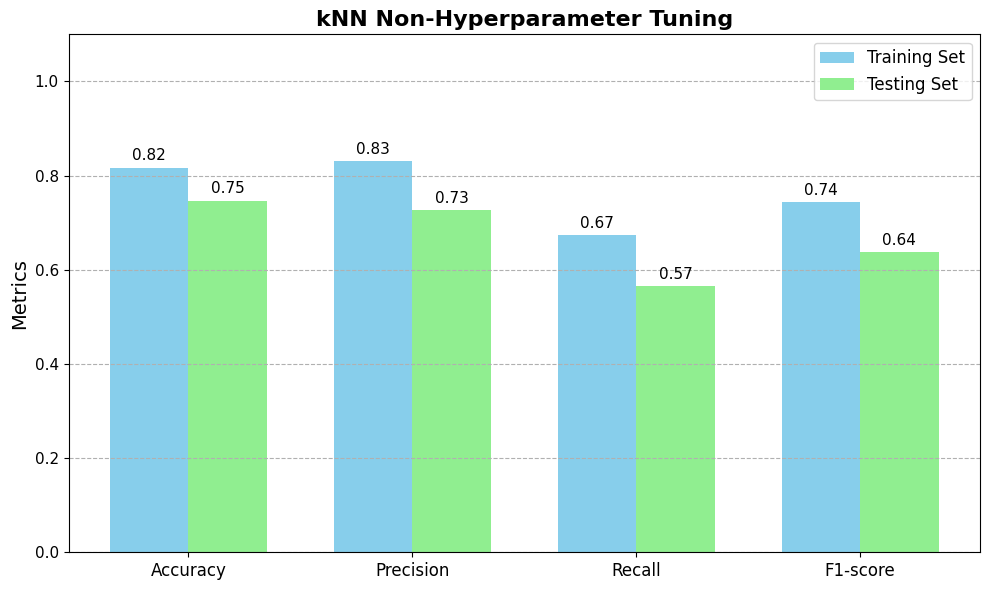

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.07
Precision: 0.1031
Recall: 0.1075
F1-Score: 0.1072


In [33]:
training_metrics = [knn_train_accuracy, knn_train_precision, knn_train_recall, knn_train_f1]
testing_metrics = [knn_accuracy, knn_precision, knn_recall, knn_f1]

compare_metrics(training_metrics, testing_metrics, 'kNN Non-Hyperparameter Tuning')
compute_metric_difference(training_metrics, testing_metrics)

#### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)
y_test_pred = dt_clf.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_test_pred)
dt_precision = precision_score(y_test, y_test_pred)
dt_recall = recall_score(y_test, y_test_pred)
dt_f1 = f1_score(y_test, y_test_pred)

print_metrics(dt_accuracy, dt_precision, dt_recall, dt_f1)

Accuracy: 0.6747
Precision: 0.5868
Recall: 0.5723
F1-Score: 0.5794


In [35]:
y_train_pred = dt_clf.predict(X_train)

dt_train_accuracy = accuracy_score(y_train, y_train_pred)
dt_train_precision = precision_score(y_train, y_train_pred)
dt_train_recall = recall_score(y_train, y_train_pred)
dt_train_f1 = f1_score(y_train, y_train_pred)

print_metrics(dt_train_accuracy, dt_train_precision, dt_train_recall, dt_train_f1)

Accuracy: 0.9230
Precision: 0.9812
Recall: 0.8204
F1-Score: 0.8936


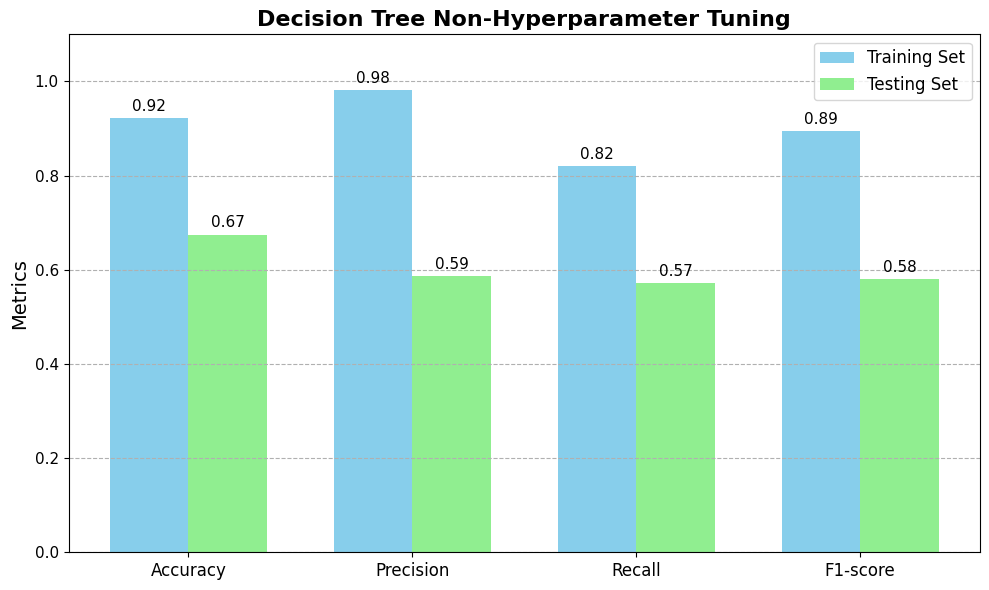

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.2483
Precision: 0.3944
Recall: 0.2481
F1-Score: 0.3142


In [36]:
training_metrics = [dt_train_accuracy, dt_train_precision, dt_train_recall, dt_train_f1]
testing_metrics = [dt_accuracy, dt_precision, dt_recall, dt_f1]

compare_metrics(training_metrics, testing_metrics, 'Decision Tree Non-Hyperparameter Tuning')
compute_metric_difference(training_metrics, testing_metrics)

#### Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()

nb_clf.fit(X_train, y_train)
y_test_pred = nb_clf.predict(X_test)

nb_accuracy = accuracy_score(y_test, y_test_pred)
nb_precision = precision_score(y_test, y_test_pred)
nb_recall = recall_score(y_test, y_test_pred)
nb_f1 = f1_score(y_test, y_test_pred)

print_metrics(nb_accuracy, nb_precision, nb_recall, nb_f1)

Accuracy: 0.7217
Precision: 0.8176
Recall: 0.3723
F1-Score: 0.5116


In [38]:
y_train_pred = nb_clf.predict(X_train)

nb_train_accuracy = accuracy_score(y_train, y_train_pred)
nb_train_precision = precision_score(y_train, y_train_pred)
nb_train_recall = recall_score(y_train, y_train_pred)
nb_train_f1 = f1_score(y_train, y_train_pred)

print_metrics(nb_train_accuracy, nb_train_precision, nb_train_recall, nb_train_f1)

Accuracy: 0.7358
Precision: 0.8539
Recall: 0.3984
F1-Score: 0.5433


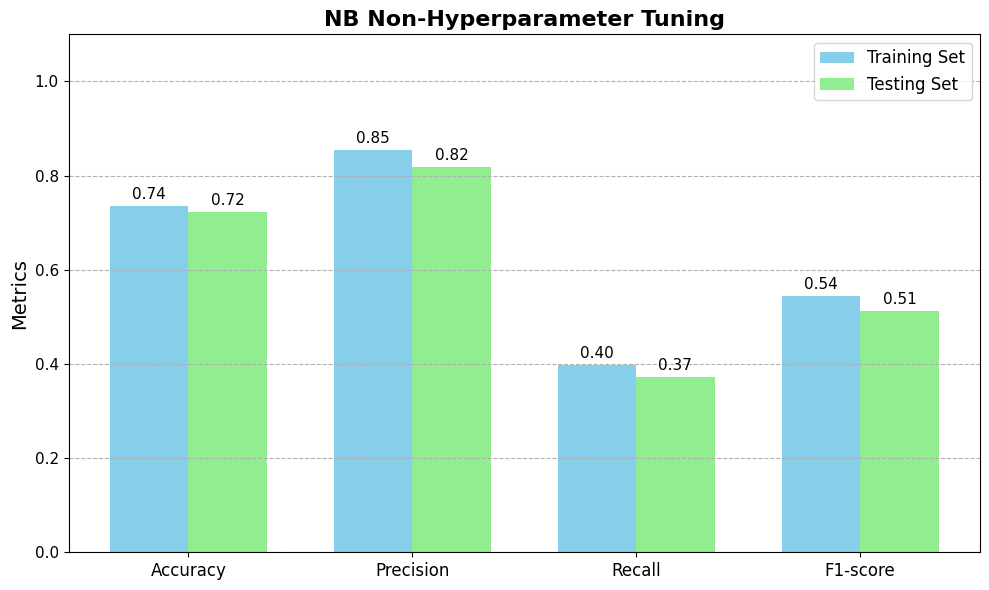

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.0141
Precision: 0.0364
Recall: 0.0261
F1-Score: 0.0317


In [39]:
training_metrics = [nb_train_accuracy, nb_train_precision, nb_train_recall, nb_train_f1]
testing_metrics = [nb_accuracy, nb_precision, nb_recall, nb_f1]

compare_metrics(training_metrics, testing_metrics, 'NB Non-Hyperparameter Tuning')
compute_metric_difference(training_metrics, testing_metrics)

#### SVM

In [40]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC()

svm_clf.fit(X_train, y_train)
y_test_pred = svm_clf.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_test_pred)
svm_precision = precision_score(y_test, y_test_pred)
svm_recall = recall_score(y_test, y_test_pred)
svm_f1 = f1_score(y_test, y_test_pred)

print_metrics(svm_accuracy, svm_precision, svm_recall, svm_f1)

Accuracy: 0.7301
Precision: 0.7149
Recall: 0.5169
F1-Score: 0.6000


c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [41]:
y_train_pred = svm_clf.predict(X_train)

svm_train_accuracy = accuracy_score(y_train, y_train_pred)
svm_train_precision = precision_score(y_train, y_train_pred)
svm_train_recall = recall_score(y_train, y_train_pred)
svm_train_f1 = f1_score(y_train, y_train_pred)

print_metrics(svm_train_accuracy, svm_train_precision, svm_train_recall, svm_train_f1)

Accuracy: 0.7549
Precision: 0.7784
Recall: 0.5295
F1-Score: 0.6303


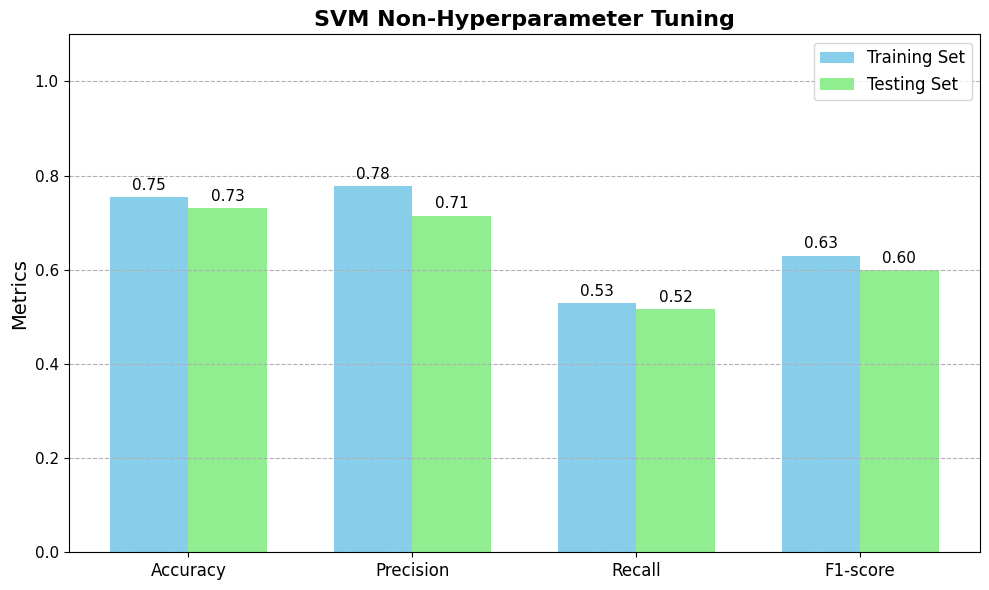

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.0248
Precision: 0.0635
Recall: 0.0126
F1-Score: 0.0303


In [42]:
training_metrics = [svm_train_accuracy, svm_train_precision, svm_train_recall, svm_train_f1]
testing_metrics = [svm_accuracy, svm_precision, svm_recall, svm_f1]

compare_metrics(training_metrics, testing_metrics, 'SVM Non-Hyperparameter Tuning')
compute_metric_difference(training_metrics, testing_metrics)

#### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression()

logistic_clf.fit(X_train, y_train)
y_test_pred = logistic_clf.predict(X_test)

logistic_accuracy = accuracy_score(y_test, y_test_pred)
logistic_precision = precision_score(y_test, y_test_pred)
logistic_recall = recall_score(y_test, y_test_pred)
logistic_f1 = f1_score(y_test, y_test_pred)

print_metrics(logistic_accuracy, logistic_precision, logistic_recall, logistic_f1)

Accuracy: 0.7337
Precision: 0.7097
Recall: 0.5415
F1-Score: 0.6143


In [44]:
y_train_pred = dt_clf.predict(X_train)

logistic_train_accuracy = accuracy_score(y_train, y_train_pred)
logistic_train_precision = precision_score(y_train, y_train_pred)
logistic_train_recall = recall_score(y_train, y_train_pred)
logistic_train_f1 = f1_score(y_train, y_train_pred)

print_metrics(logistic_train_accuracy, logistic_train_precision, logistic_train_recall, logistic_train_f1)

Accuracy: 0.9230
Precision: 0.9812
Recall: 0.8204
F1-Score: 0.8936


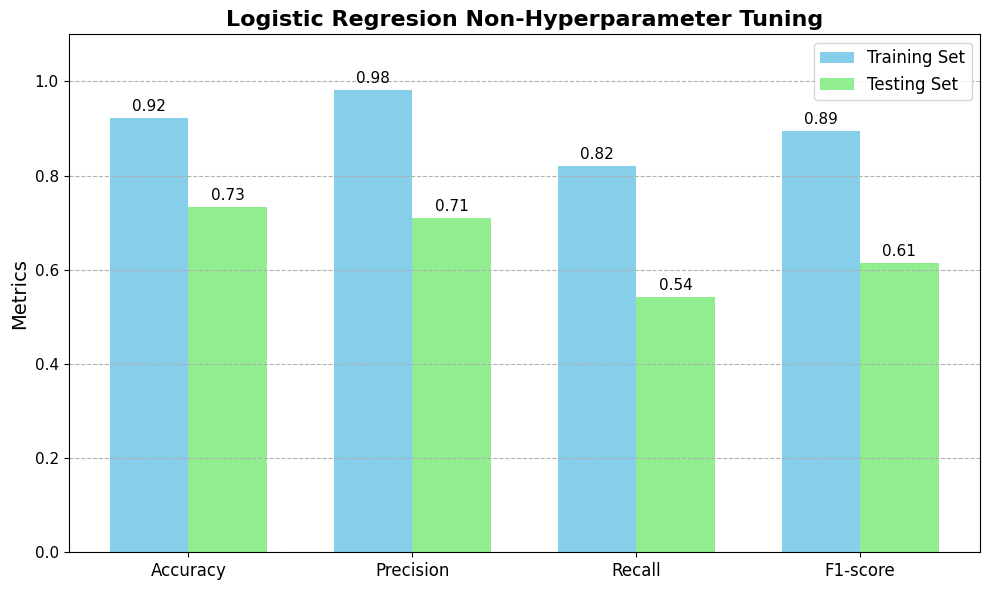

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.1892
Precision: 0.2715
Recall: 0.2789
F1-Score: 0.2793


In [45]:
training_metrics = [logistic_train_accuracy, logistic_train_precision, logistic_train_recall, logistic_train_f1]
testing_metrics = [logistic_accuracy, logistic_precision, logistic_recall, logistic_f1]

compare_metrics(training_metrics, testing_metrics, 'Logistic Regresion Non-Hyperparameter Tuning')
compute_metric_difference(training_metrics, testing_metrics)

### Các mô hình học máy thuộc Ensemble Learing

#### Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()

gb_clf.fit(X_train, y_train)
y_test_pred = gb_clf.predict(X_test)

gb_accuracy_before = accuracy_score(y_test, y_test_pred)
gb_precision_before = precision_score(y_test, y_test_pred)
gb_recall_before = recall_score(y_test, y_test_pred)
gb_f1_before = f1_score(y_test, y_test_pred)

print_metrics(gb_accuracy_before, gb_precision_before, gb_recall_before, gb_f1_before)

Accuracy: 0.7578
Precision: 0.7696
Recall: 0.5446
F1-Score: 0.6378


In [47]:
y_train_pred = gb_clf.predict(X_train)

gb_train_accuracy = accuracy_score(y_train, y_train_pred)
gb_train_precision = precision_score(y_train, y_train_pred)
gb_train_recall = recall_score(y_train, y_train_pred)
gb_train_f1 = f1_score(y_train, y_train_pred)

print_metrics(gb_train_accuracy, gb_train_precision, gb_train_recall, gb_train_f1)

Accuracy: 0.8030
Precision: 0.8631
Recall: 0.5950
F1-Score: 0.7044


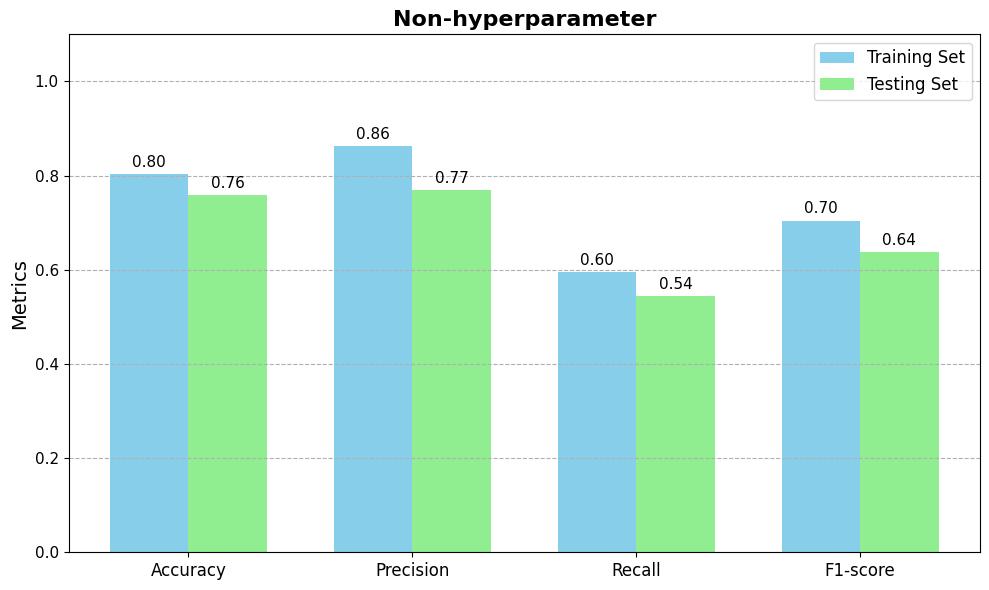

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.0452
Precision: 0.0936
Recall: 0.0504
F1-Score: 0.0666


In [48]:
gb_training_metrics_before = [gb_train_accuracy, gb_train_precision, gb_train_recall, gb_train_f1]
gb_testing_metrics_before = [gb_accuracy_before, gb_precision_before, gb_recall_before, gb_f1_before]

compare_metrics(gb_training_metrics_before, gb_testing_metrics_before, title_1)
compute_metric_difference(gb_training_metrics_before, gb_testing_metrics_before)

#### AdaBoost

In [49]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()

ada_clf.fit(X_train, y_train)
y_test_pred = ada_clf.predict(X_test)

ada_accuracy_before = accuracy_score(y_test, y_test_pred)
ada_precision_before = precision_score(y_test, y_test_pred)
ada_recall_before = recall_score(y_test, y_test_pred)
ada_f1_before = f1_score(y_test, y_test_pred)

print_metrics(ada_accuracy_before, ada_precision_before, ada_recall_before, ada_f1_before)

Accuracy: 0.7157
Precision: 0.6831
Recall: 0.5108
F1-Score: 0.5845


In [50]:
y_train_pred = ada_clf.predict(X_train)

ada_train_accuracy = accuracy_score(y_train, y_train_pred)
ada_train_precision = precision_score(y_train, y_train_pred)
ada_train_recall = recall_score(y_train, y_train_pred)
ada_train_f1 = f1_score(y_train, y_train_pred)

print_metrics(ada_train_accuracy, ada_train_precision, ada_train_recall, ada_train_f1)

Accuracy: 0.7616
Precision: 0.7726
Recall: 0.5609
F1-Score: 0.6500


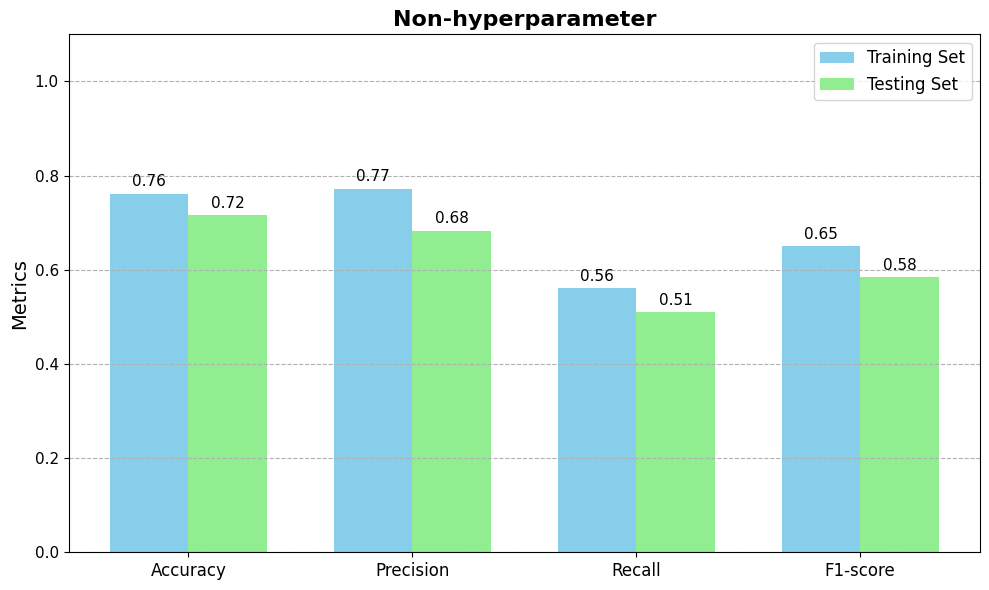

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.046
Precision: 0.0894
Recall: 0.0502
F1-Score: 0.0655


In [51]:
ada_training_metrics_before = [ada_train_accuracy, ada_train_precision, ada_train_recall, ada_train_f1]
ada_testing_metrics_before = [ada_accuracy_before, ada_precision_before, ada_recall_before, ada_f1_before]

compare_metrics(ada_training_metrics_before, ada_testing_metrics_before, title_1)
compute_metric_difference(ada_training_metrics_before, ada_testing_metrics_before)

#### Bagging

In [52]:
from sklearn.ensemble import BaggingClassifier

bg_clf = BaggingClassifier()

bg_clf.fit(X_train, y_train)
y_test_pred = bg_clf.predict(X_test)

bg_accuracy_before = accuracy_score(y_test, y_test_pred)
bg_precision_before = precision_score(y_test, y_test_pred)
bg_recall_before = recall_score(y_test, y_test_pred)
bg_f1_before = f1_score(y_test, y_test_pred)

print_metrics(bg_accuracy_before, bg_precision_before, bg_recall_before, bg_f1_before)

Accuracy: 0.7048
Precision: 0.6361
Recall: 0.5754
F1-Score: 0.6042


In [53]:
y_train_pred = bg_clf.predict(X_train)

bg_train_accuracy = accuracy_score(y_train, y_train_pred)
bg_train_precision = precision_score(y_train, y_train_pred)
bg_train_recall = recall_score(y_train, y_train_pred)
bg_train_f1 = f1_score(y_train, y_train_pred)

print_metrics(bg_train_accuracy, bg_train_precision, bg_train_recall, bg_train_f1)

Accuracy: 0.9074
Precision: 0.8935
Recall: 0.8689
F1-Score: 0.8811


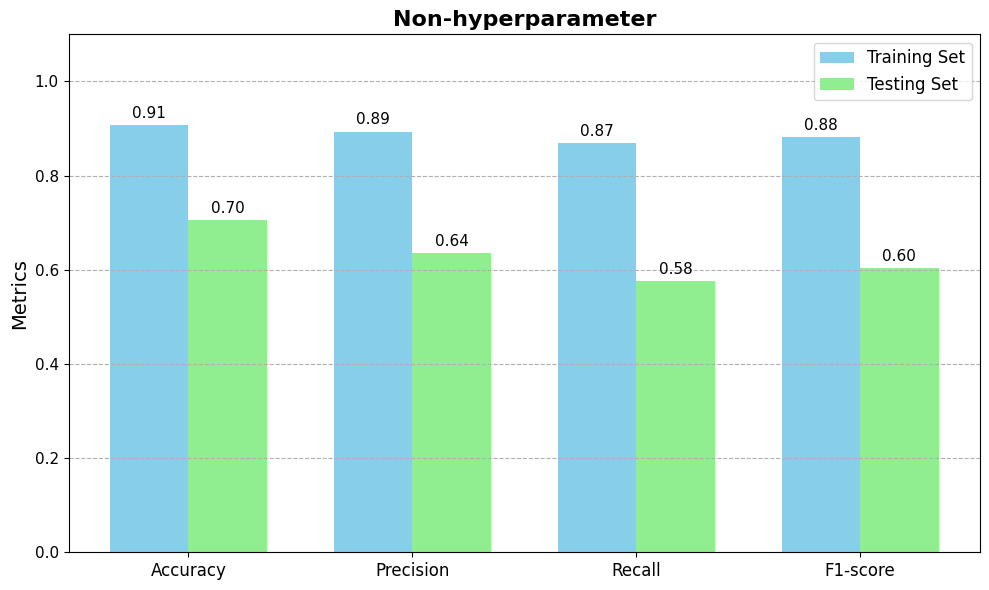

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.2026
Precision: 0.2575
Recall: 0.2936
F1-Score: 0.2769


In [54]:
bg_training_metrics_before = [bg_train_accuracy, bg_train_precision, bg_train_recall, bg_train_f1]
bg_testing_metrics_before = [bg_accuracy_before, bg_precision_before, bg_recall_before, bg_f1_before]

compare_metrics(bg_training_metrics_before, bg_testing_metrics_before, title_1)
compute_metric_difference(bg_training_metrics_before, bg_testing_metrics_before)

#### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)
y_test_pred = rf_clf.predict(X_test)

rf_accuracy_before = accuracy_score(y_test, y_test_pred)
rf_precision_before = precision_score(y_test, y_test_pred)
rf_recall_before = recall_score(y_test, y_test_pred)
rf_f1_before = f1_score(y_test, y_test_pred)

print_metrics(rf_accuracy_before, rf_precision_before, rf_recall_before, rf_f1_before)

Accuracy: 0.7000
Precision: 0.6242
Recall: 0.5877
F1-Score: 0.6054


In [56]:
y_train_pred = rf_clf.predict(X_train)

rf_train_accuracy = accuracy_score(y_train, y_train_pred)
rf_train_precision = precision_score(y_train, y_train_pred)
rf_train_recall = recall_score(y_train, y_train_pred)
rf_train_f1 = f1_score(y_train, y_train_pred)

print_metrics(rf_train_accuracy, rf_train_precision, rf_train_recall, rf_train_f1)

Accuracy: 0.9230
Precision: 0.9171
Recall: 0.8847
F1-Score: 0.9006


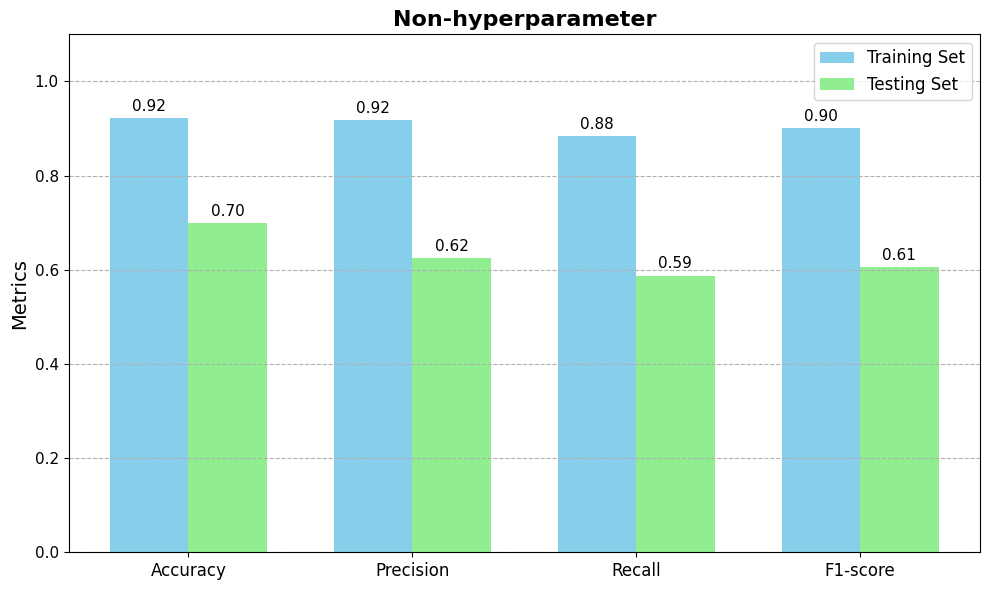

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.223
Precision: 0.2929
Recall: 0.297
F1-Score: 0.2952


In [57]:
rf_training_metrics_before = [rf_train_accuracy, rf_train_precision, rf_train_recall, rf_train_f1]
rf_testing_metrics_before = [rf_accuracy_before, rf_precision_before, rf_recall_before, rf_f1_before]

compare_metrics(rf_training_metrics_before, rf_testing_metrics_before, title_1)
compute_metric_difference(rf_training_metrics_before, rf_testing_metrics_before)

#### Voting Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

gb_clf = GradientBoostingClassifier()
lr_clf = LogisticRegression()
rf_clf = RandomForestClassifier()

vt_clf = VotingClassifier(
    estimators=[('rf', rf_clf), ('gb', gb_clf), ('lr', lr_clf)]
)

vt_clf.fit(X_train, y_train)
y_test_pred = vt_clf.predict(X_test)

vt_accuracy_before = accuracy_score(y_test, y_test_pred)
vt_precision_before = precision_score(y_test, y_test_pred)
vt_recall_before = recall_score(y_test, y_test_pred)
vt_f1_before = f1_score(y_test, y_test_pred)

print_metrics(vt_accuracy_before, vt_precision_before, vt_recall_before, vt_f1_before)

Accuracy: 0.7518
Precision: 0.7449
Recall: 0.5569
F1-Score: 0.6373


In [59]:
y_train_pred = vt_clf.predict(X_train)

vt_train_accuracy = accuracy_score(y_train, y_train_pred)
vt_train_precision = precision_score(y_train, y_train_pred)
vt_train_recall = recall_score(y_train, y_train_pred)
vt_train_f1 = f1_score(y_train, y_train_pred)

print_metrics(vt_train_accuracy, vt_train_precision, vt_train_recall, vt_train_f1)

Accuracy: 0.8232
Precision: 0.8920
Recall: 0.6278
F1-Score: 0.7369


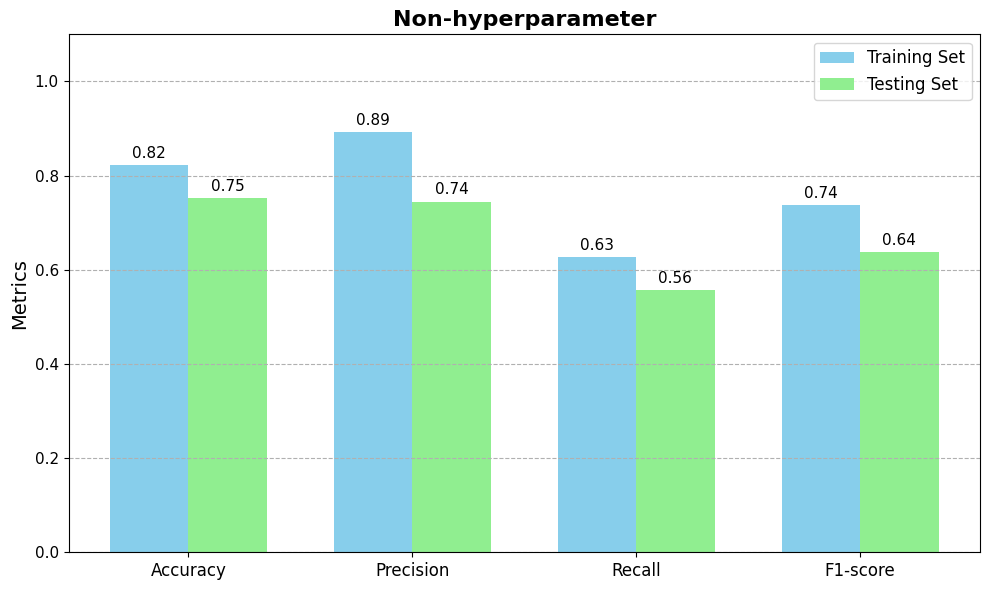

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.0714
Precision: 0.1471
Recall: 0.0709
F1-Score: 0.0996


In [60]:
vt_training_metrics_before = [vt_train_accuracy, vt_train_precision, vt_train_recall, vt_train_f1]
vt_testing_metrics_before = [vt_accuracy_before, vt_precision_before, vt_recall_before, vt_f1_before]

compare_metrics(vt_training_metrics_before, vt_testing_metrics_before, title_1)
compute_metric_difference(vt_training_metrics_before, vt_testing_metrics_before)

#### Stacking

In [61]:
from sklearn.ensemble import StackingClassifier

st_clf = StackingClassifier(
    estimators=[('rf', rf_clf), ('gb', gb_clf)],
    final_estimator=lr_clf
)

st_clf.fit(X_train, y_train)
y_test_pred = st_clf.predict(X_test)

st_accuracy_before = accuracy_score(y_test, y_test_pred)
st_precision_before = precision_score(y_test, y_test_pred)
st_recall_before = recall_score(y_test, y_test_pred)
st_f1_before = f1_score(y_test, y_test_pred)

print_metrics(st_accuracy_before, st_precision_before, st_recall_before, st_f1_before)

Accuracy: 0.7590
Precision: 0.7551
Recall: 0.5692
F1-Score: 0.6491


In [62]:
y_train_pred = st_clf.predict(X_train)

st_train_accuracy = accuracy_score(y_train, y_train_pred)
st_train_precision = precision_score(y_train, y_train_pred)
st_train_recall = recall_score(y_train, y_train_pred)
st_train_f1 = f1_score(y_train, y_train_pred)

print_metrics(st_train_accuracy, st_train_precision, st_train_recall, st_train_f1)

Accuracy: 0.7802
Precision: 0.8018
Recall: 0.5885
F1-Score: 0.6788


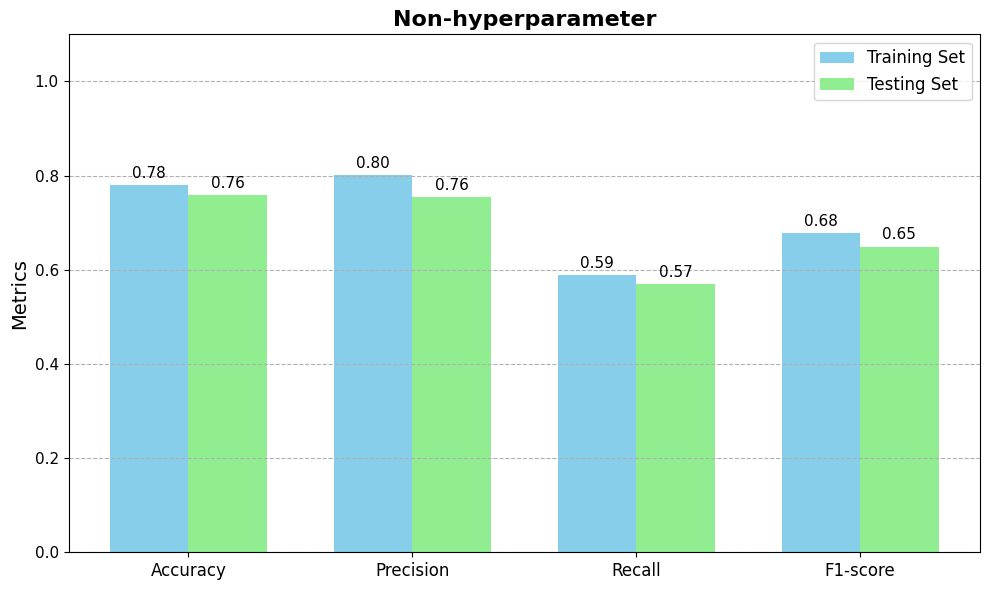

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.0212
Precision: 0.0467
Recall: 0.0192
F1-Score: 0.0296


In [63]:
st_training_metrics_before = [st_train_accuracy, st_train_precision, st_train_recall, st_train_f1]
st_testing_metrics_before = [st_accuracy_before, st_precision_before, st_recall_before, st_f1_before]

compare_metrics(st_training_metrics_before, st_testing_metrics_before, title_1)
compute_metric_difference(st_training_metrics_before, st_testing_metrics_before)

#### Hàm visualize_metrics sử dụng để so sánh hiệu suất của nhiều bộ phân loại (classifiers) khác nhau dựa trên các độ đo đánh giá như accuracy (độ chính xác), precision (độ chính xác dương tính), recall (độ phục hồi), và F1-score.

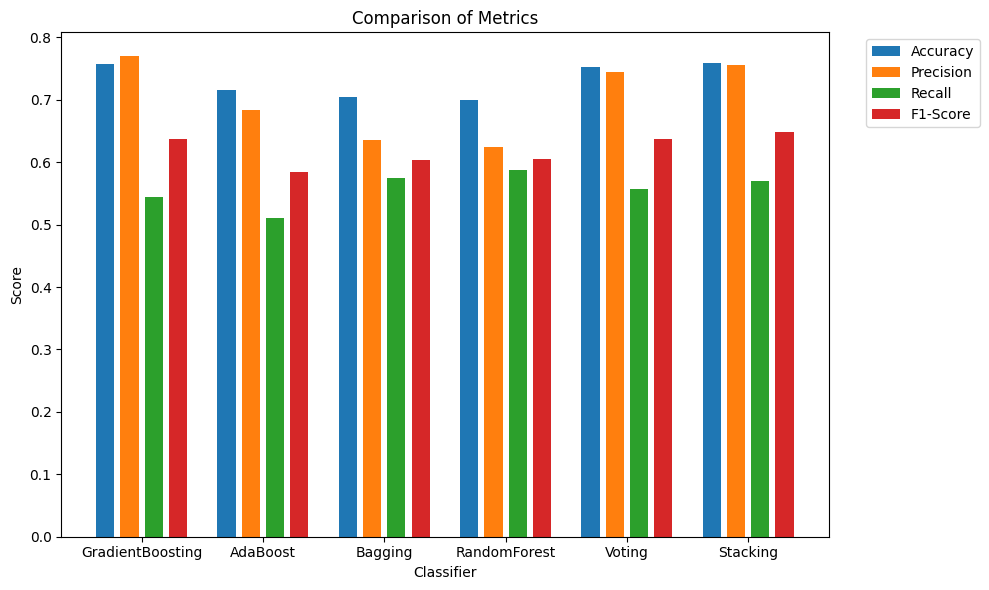

In [64]:

metrics = {
    'GradientBoosting': {
        'Accuracy': gb_accuracy_before,
        'Precision': gb_precision_before,
        'Recall': gb_recall_before,
        'F1-Score': gb_f1_before
    },

    'AdaBoost': {
        'Accuracy': ada_accuracy_before,
        'Precision': ada_precision_before,
        'Recall': ada_recall_before,
        'F1-Score': ada_f1_before
    },

    'Bagging': {
        'Accuracy': bg_accuracy_before,
        'Precision': bg_precision_before,
        'Recall': bg_recall_before,
        'F1-Score': bg_f1_before
    },

    'RandomForest': {
        'Accuracy': rf_accuracy_before,
        'Precision': rf_precision_before,
        'Recall': rf_recall_before,
        'F1-Score': rf_f1_before
    },

    'Voting': {
        'Accuracy': vt_accuracy_before,
        'Precision': vt_precision_before,
        'Recall': vt_recall_before,
        'F1-Score': vt_f1_before
    },

    'Stacking': {
        'Accuracy': st_accuracy_before,
        'Precision': st_precision_before,
        'Recall': st_recall_before,
        'F1-Score': st_f1_before
    }
}

visualize_metrics(metrics=metrics)


##### Tổng quan các mô hình trên

Gradient Boosting và Stacking là hai phương pháp có hiệu suất tốt hơn so với các phương pháp còn lại. Cả hai phương pháp này đạt được độ chính xác, độ chính xác dương tính, độ chính xác phân loại và F1-Score tốt trên tập kiểm tra. Voting Classifier cũng cho thấy hiệu suất tương đối cao, trong khi Random Forest, Ada Boosting và Bagging có hiệu suất trung bình. 

## Phần 3: Sử dụng Feed Forward Neural Network và Reccurent Neural Network (hoặc mô thuộc loại này) để giải quyết bài toán

### Feed Forward Neurl Network


Epoch 1/100
61/61 [==============================] - 1s 4ms/step - loss: 0.6809 - accuracy: 0.6029 - val_loss: 0.6658 - val_accuracy: 0.6819
Epoch 2/100
61/61 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.7011 - val_loss: 0.6418 - val_accuracy: 0.7036
Epoch 3/100
61/61 [==============================] - 0s 2ms/step - loss: 0.6295 - accuracy: 0.7342 - val_loss: 0.6220 - val_accuracy: 0.7253
Epoch 4/100
61/61 [==============================] - 0s 2ms/step - loss: 0.6112 - accuracy: 0.7415 - val_loss: 0.6062 - val_accuracy: 0.7313
Epoch 5/100
61/61 [==============================] - 0s 2ms/step - loss: 0.5965 - accuracy: 0.7451 - val_loss: 0.5936 - val_accuracy: 0.7337
Epoch 6/100
61/61 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.7492 - val_loss: 0.5833 - val_accuracy: 0.7313
Epoch 7/100
61/61 [==============================] - 0s 2ms/step - loss: 0.5742 - accuracy: 0.7528 - val_loss: 0.5748 - val_accuracy: 0.7325
Epoch 8/100
6

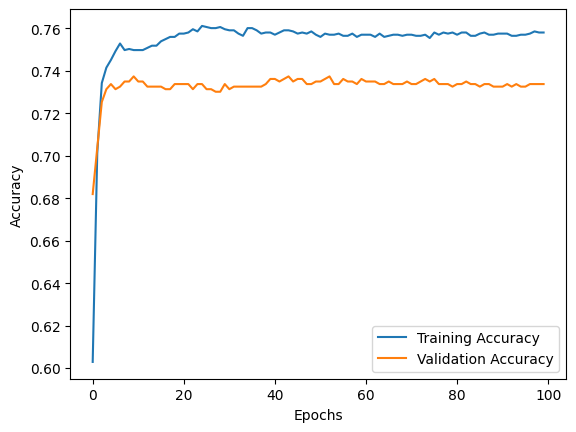

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 17 (68.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [65]:
model_FFNW = tf.keras.Sequential([
    tf.keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid'),
])

model_FFNW.compile(loss="binary_crossentropy", metrics='accuracy', optimizer='adam')

history_FFNW_before = model_FFNW.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

plot_accuracy_history(history_FFNW_before)

print(model_FFNW.summary())

### Reccurent Neural Network

Epoch 1/100
61/61 [==============================] - 1s 6ms/step - loss: 1.0056 - accuracy: 0.5055 - val_loss: 0.9944 - val_accuracy: 0.5022
Epoch 2/100
61/61 [==============================] - 0s 4ms/step - loss: 0.9778 - accuracy: 0.5080 - val_loss: 0.9675 - val_accuracy: 0.5041
Epoch 3/100
61/61 [==============================] - 0s 4ms/step - loss: 0.9526 - accuracy: 0.5095 - val_loss: 0.9430 - val_accuracy: 0.5082
Epoch 4/100
61/61 [==============================] - 0s 4ms/step - loss: 0.9292 - accuracy: 0.5141 - val_loss: 0.9200 - val_accuracy: 0.5145
Epoch 5/100
61/61 [==============================] - 0s 4ms/step - loss: 0.9076 - accuracy: 0.5241 - val_loss: 0.8989 - val_accuracy: 0.5323
Epoch 6/100
61/61 [==============================] - 0s 4ms/step - loss: 0.8874 - accuracy: 0.5431 - val_loss: 0.8792 - val_accuracy: 0.5441
Epoch 7/100
61/61 [==============================] - 0s 4ms/step - loss: 0.8685 - accuracy: 0.5471 - val_loss: 0.8608 - val_accuracy: 0.5447
Epoch 8/100
6

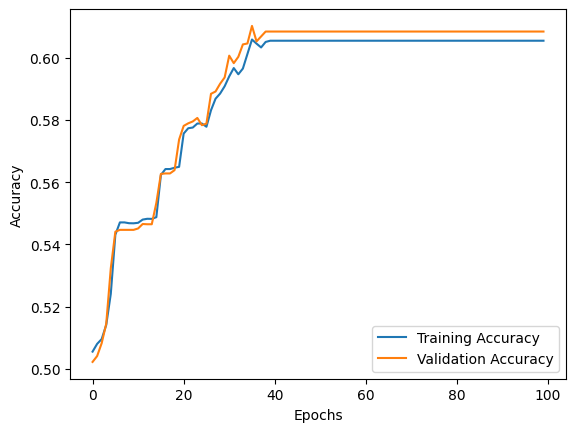

In [66]:
model_RNN = Sequential([
    tf.keras.layers.SimpleRNN(units = 1, activation='sigmoid', return_sequences=True, input_shape= (X_train.shape[1],1))
])

model_RNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_RNN_before = model_RNN.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

plot_accuracy_history(history_RNN_before)


## Phần 4: Áp dụng các kỹ thuật tránh Overfiting trên các mô hình của câu (2) và câu (3) để giải quyết bài toán

### Các mô hình học máy cơ bản

#### KNN

In [67]:
knn_clf = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [4, 6, 8, 10, 12],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto']
}

grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_params


{'algorithm': 'auto', 'n_neighbors': 12, 'p': 1, 'weights': 'uniform'}

In [68]:
best_knn_clf = grid_search.best_estimator_
y_test_pred = best_knn_clf.predict(X_test)

best_knn_accuracy = accuracy_score(y_test, y_test_pred)
best_knn_precision = precision_score(y_test, y_test_pred)
best_knn_recall = recall_score(y_test, y_test_pred)
best_knn_f1 = f1_score(y_test, y_test_pred)

print_metrics(best_knn_accuracy, best_knn_precision, best_knn_recall, best_knn_f1)


Accuracy: 0.7566
Precision: 0.8289
Recall: 0.4769
F1-Score: 0.6055


In [69]:
y_train_pred = best_knn_clf.predict(X_train)

best_knn_train_accuracy = accuracy_score(y_train, y_train_pred)
best_knn_train_precision = precision_score(y_train, y_train_pred)
best_knn_train_recall = recall_score(y_train, y_train_pred)
best_knn_train_f1 = f1_score(y_train, y_train_pred)

print_metrics(best_knn_train_accuracy, best_knn_train_precision, best_knn_train_recall, best_knn_train_f1)

Accuracy: 0.7921
Precision: 0.9020
Recall: 0.5308
F1-Score: 0.6683


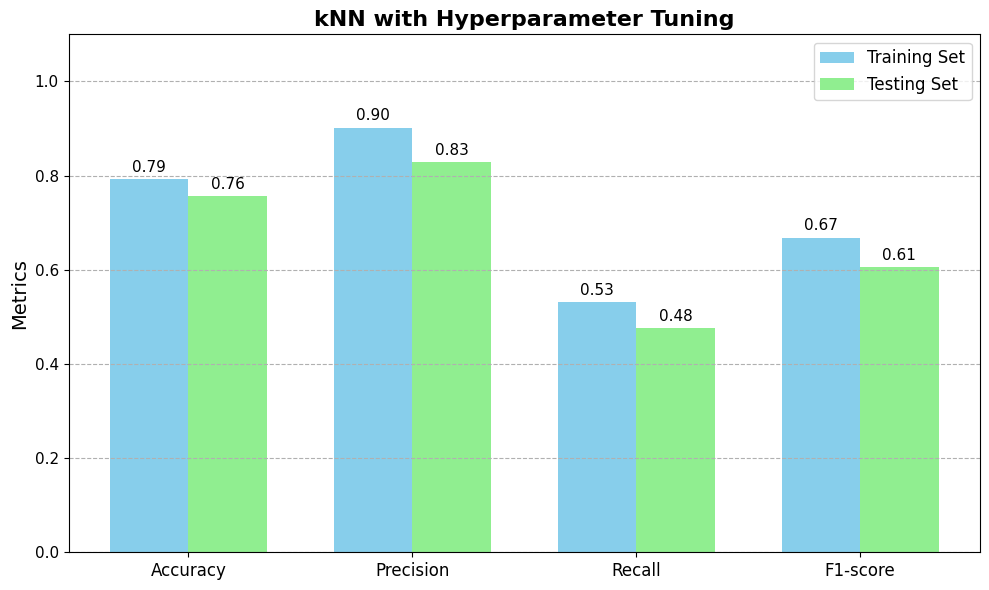

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.0355
Precision: 0.0731
Recall: 0.0539
F1-Score: 0.0628


In [70]:
training_metrics = [best_knn_train_accuracy, best_knn_train_precision, best_knn_train_recall, best_knn_train_f1]
testing_metrics = [best_knn_accuracy, best_knn_precision, best_knn_recall, best_knn_f1]

compare_metrics(training_metrics, testing_metrics, 'kNN with Hyperparameter Tuning')
compute_metric_difference(training_metrics, testing_metrics)

#### Decision Tree

In [71]:
decisionTree_clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [2, 4, 6, 8], 
    'min_samples_split': [2, 4, 6, 8],
    'criterion': ['gini', 'entropy'] 
}

grid_search = GridSearchCV(decisionTree_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_params


{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 6}

In [72]:
best_decisionTree_clf = grid_search.best_estimator_
y_test_pred = best_decisionTree_clf.predict(X_test)

best_decisionTree_accuracy = accuracy_score(y_test, y_test_pred)
best_decisionTree_precision = precision_score(y_test, y_test_pred)
best_decisionTree_recall = recall_score(y_test, y_test_pred)
best_decisionTree_f1 = f1_score(y_test, y_test_pred)

print_metrics(best_decisionTree_accuracy, best_decisionTree_precision, best_decisionTree_recall, best_decisionTree_f1)


Accuracy: 0.7627
Precision: 0.8019
Recall: 0.5231
F1-Score: 0.6331


In [73]:
y_train_pred = best_decisionTree_clf.predict(X_train)

best_decisionTree_train_accuracy = accuracy_score(y_train, y_train_pred)
best_decisionTree_train_precision = precision_score(y_train, y_train_pred)
best_decisionTree_train_recall = recall_score(y_train, y_train_pred)
best_decisionTree_train_f1 = f1_score(y_train, y_train_pred)

print_metrics(best_decisionTree_train_accuracy, best_decisionTree_train_precision, best_decisionTree_train_recall, best_decisionTree_train_f1)

Accuracy: 0.7885
Precision: 0.8583
Recall: 0.5557
F1-Score: 0.6746


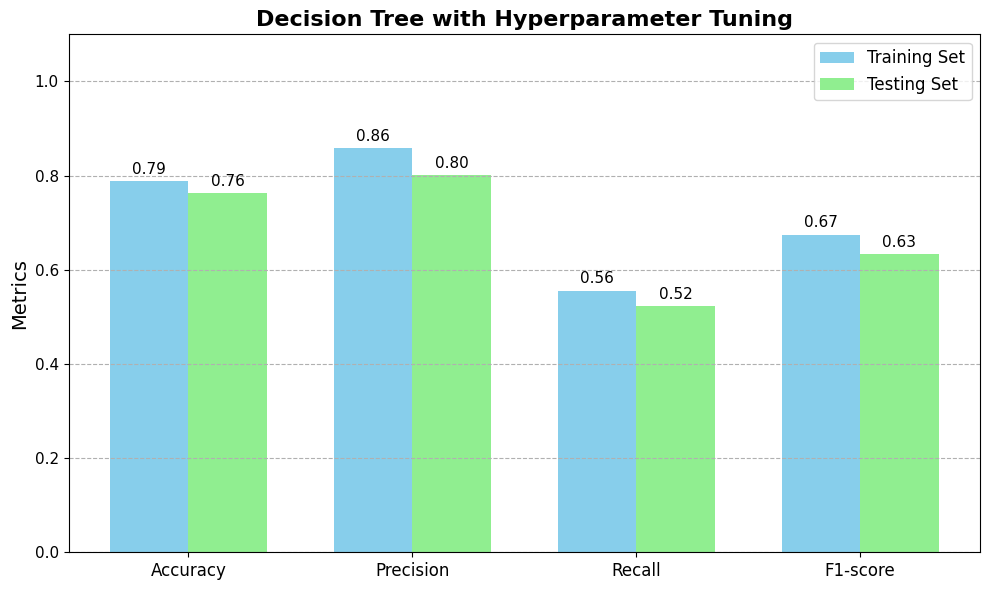

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.0259
Precision: 0.0564
Recall: 0.0326
F1-Score: 0.0415


In [74]:
training_metrics = [best_decisionTree_train_accuracy, best_decisionTree_train_precision, best_decisionTree_train_recall, best_decisionTree_train_f1]
testing_metrics = [best_decisionTree_accuracy, best_decisionTree_precision, best_decisionTree_recall, best_decisionTree_f1]

compare_metrics(training_metrics, testing_metrics, 'Decision Tree with Hyperparameter Tuning')
compute_metric_difference(training_metrics, testing_metrics)

#### Naive Bayes

In [75]:
nb_clf = GaussianNB()


#NB không có parameter nào hết
param_grid = {}

grid_search = GridSearchCV(nb_clf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_nb_clf = grid_search.best_estimator_

best_nb_clf

GaussianNB()

In [76]:
y_test_pred = best_nb_clf.predict(X_test)

best_nb_accuracy = accuracy_score(y_test, y_test_pred)
best_nb_precision = precision_score(y_test, y_test_pred)
best_nb_recall = recall_score(y_test, y_test_pred)
best_nb_f1 = f1_score(y_test, y_test_pred)

print_metrics(best_nb_accuracy, best_nb_precision, best_nb_recall, best_nb_f1)


Accuracy: 0.7217
Precision: 0.8176
Recall: 0.3723
F1-Score: 0.5116


In [77]:
y_train_pred = best_nb_clf.predict(X_train)

best_nb_train_accuracy = accuracy_score(y_train, y_train_pred)
best_nb_train_precision = precision_score(y_train, y_train_pred)
best_nb_train_recall = recall_score(y_train, y_train_pred)
best_nb_train_f1 = f1_score(y_train, y_train_pred)

print_metrics(best_nb_train_accuracy, best_nb_train_precision, best_nb_train_recall, best_nb_train_f1)

Accuracy: 0.7358
Precision: 0.8539
Recall: 0.3984
F1-Score: 0.5433


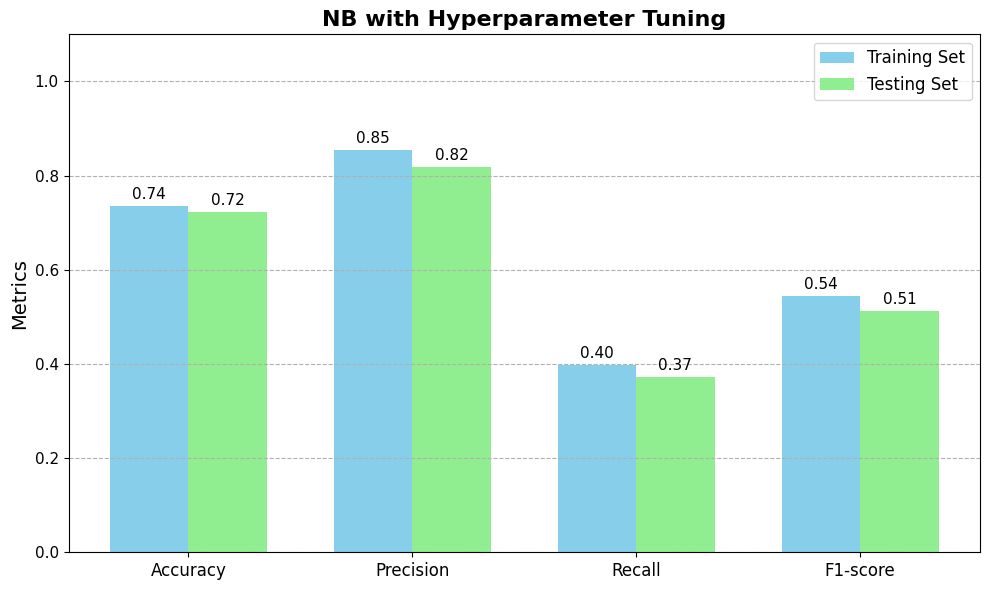

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.0141
Precision: 0.0364
Recall: 0.0261
F1-Score: 0.0317


In [78]:
training_metrics = [best_nb_train_accuracy, best_nb_train_precision, best_nb_train_recall, best_nb_train_f1]
testing_metrics = [best_nb_accuracy, best_nb_precision, best_nb_recall, best_nb_f1]

compare_metrics(training_metrics, testing_metrics, 'NB with Hyperparameter Tuning')
compute_metric_difference(training_metrics, testing_metrics)

#### SVM

In [79]:
svm_clf = LinearSVC()

param_grid = {
    'C': [0, 0.1, 1, 10, 100],
}

grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_params


c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of 

c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-pa

{'C': 0.1}

In [80]:
best_svm_clf = grid_search.best_estimator_
y_test_pred = best_svm_clf.predict(X_test)

best_svm_accuracy = accuracy_score(y_test, y_test_pred)
best_svm_precision = precision_score(y_test, y_test_pred)
best_svm_recall = recall_score(y_test, y_test_pred)
best_svm_f1 = f1_score(y_test, y_test_pred)

print_metrics(best_svm_accuracy, best_svm_precision, best_svm_recall, best_svm_f1)


Accuracy: 0.7301
Precision: 0.7149
Recall: 0.5169
F1-Score: 0.6000


In [81]:
y_train_pred = best_svm_clf.predict(X_train)

best_svm_train_accuracy = accuracy_score(y_train, y_train_pred)
best_svm_train_precision = precision_score(y_train, y_train_pred)
best_svm_train_recall = recall_score(y_train, y_train_pred)
best_svm_train_f1 = f1_score(y_train, y_train_pred)

print_metrics(best_svm_train_accuracy, best_svm_train_precision, best_svm_train_recall, best_svm_train_f1)

Accuracy: 0.7544
Precision: 0.7780
Recall: 0.5282
F1-Score: 0.6292


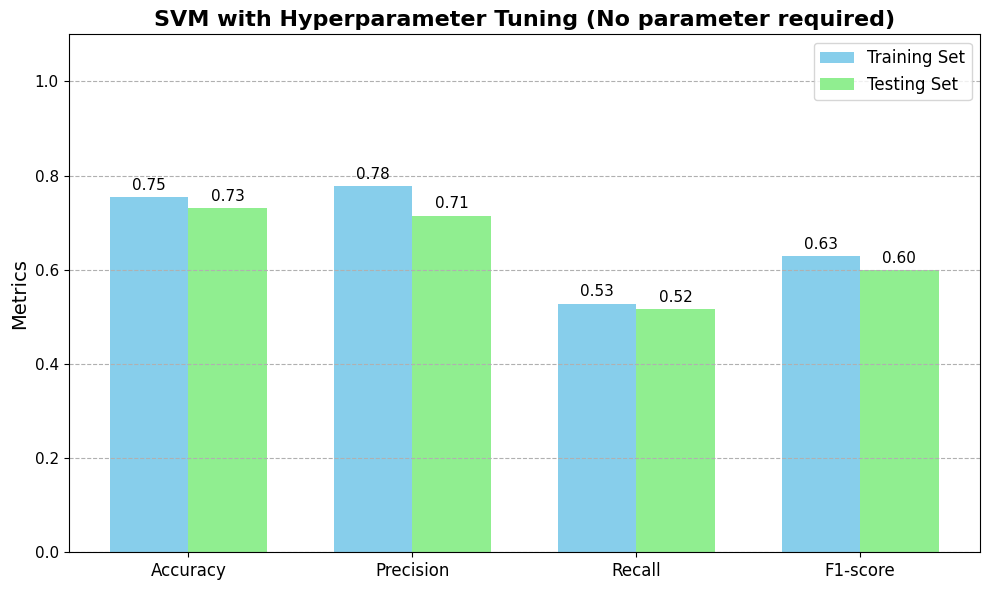

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.0243
Precision: 0.0631
Recall: 0.0113
F1-Score: 0.0292


In [83]:
training_metrics = [best_svm_train_accuracy, best_svm_train_precision, best_svm_train_recall, best_svm_train_f1]
testing_metrics = [best_svm_accuracy, best_svm_precision, best_svm_recall, best_svm_f1]

compare_metrics(training_metrics, testing_metrics, 'SVM with Hyperparameter Tuning (No parameter required)')
compute_metric_difference(training_metrics, testing_metrics)

#### Logistic Regression

In [84]:
logistic_Regression_clf = LinearSVC()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(logistic_Regression_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_params


c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of 

c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-pa

{'C': 0.01, 'penalty': 'l2'}

In [85]:
best_logistic_regression_clf = grid_search.best_estimator_
y_test_pred = best_logistic_regression_clf.predict(X_test)

best_logistic_regression_accuracy = accuracy_score(y_test, y_test_pred)
best_logistic_regression_precision = precision_score(y_test, y_test_pred)
best_logistic_regression_recall = recall_score(y_test, y_test_pred)
best_logistic_regression_f1 = f1_score(y_test, y_test_pred)

print_metrics(best_logistic_regression_accuracy, best_logistic_regression_precision, best_logistic_regression_recall, best_logistic_regression_f1)


Accuracy: 0.7313
Precision: 0.7179
Recall: 0.5169
F1-Score: 0.6011


In [86]:
y_train_pred = best_logistic_regression_clf.predict(X_train)

best_logistic_regression_train_accuracy = accuracy_score(y_train, y_train_pred)
best_logistic_regression_train_precision = precision_score(y_train, y_train_pred)
best_logistic_regression_train_recall = recall_score(y_train, y_train_pred)
best_logistic_regression_train_f1 = f1_score(y_train, y_train_pred)

print_metrics(best_logistic_regression_train_accuracy, best_logistic_regression_train_precision, best_logistic_regression_train_recall, best_logistic_regression_train_f1)

Accuracy: 0.7528
Precision: 0.7756
Recall: 0.5256
F1-Score: 0.6266


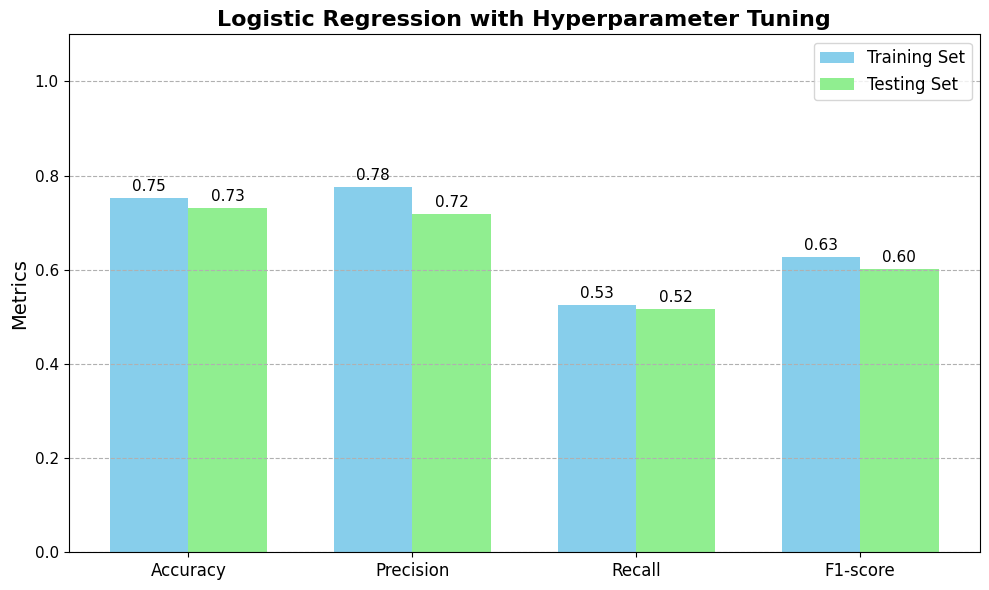

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.0215
Precision: 0.0577
Recall: 0.0086
F1-Score: 0.0255


In [87]:
training_metrics = [best_logistic_regression_train_accuracy, best_logistic_regression_train_precision, best_logistic_regression_train_recall, best_logistic_regression_train_f1]
testing_metrics = [best_logistic_regression_accuracy, best_logistic_regression_precision, best_logistic_regression_recall, best_logistic_regression_f1]

compare_metrics(training_metrics, testing_metrics, 'Logistic Regression with Hyperparameter Tuning')
compute_metric_difference(training_metrics, testing_metrics)

### Các mô hình học máy thuộc Ensemble Learing

#### Gradient Boosting

 Sử dụng GridSearchCV, ta có thể tìm kiếm được bộ giá trị siêu tham số tốt nhất.

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 7, 9]
}
gb_clf = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=5)
grid_search.fit(X_train, y_train)

#min_sample_split=125,  sub_sample=0.8

print("Bộ siêu tham số tốt nhất: ", grid_search.best_params_) 

Bộ siêu tham số tốt nhất:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [89]:
gb_clf = GradientBoostingClassifier(max_depth=3, n_estimators=100, learning_rate=0.01)
#3, 200, 0.01
# 3 100 0.01
gb_clf.fit(X_train, y_train)

y_test_pred = gb_clf.predict(X_test) 

gb_accuracy = accuracy_score(y_test, y_test_pred)
gb_precision = precision_score(y_test, y_test_pred)
gb_recall = recall_score(y_test, y_test_pred)
gb_f1 = f1_score(y_test, y_test_pred)

print_metrics(gb_accuracy, gb_precision, gb_recall, gb_f1)

Accuracy: 0.7554
Precision: 0.9067
Recall: 0.4185
F1-Score: 0.5726


In [90]:
y_train_pred = gb_clf.predict(X_train)

gb_train_accuracy = accuracy_score(y_train, y_train_pred)
gb_train_precision = precision_score(y_train, y_train_pred)
gb_train_recall = recall_score(y_train, y_train_pred)
gb_train_f1 = f1_score(y_train, y_train_pred)

print_metrics(gb_train_accuracy, gb_train_precision, gb_train_recall, gb_train_f1)

Accuracy: 0.7523
Precision: 0.9011
Recall: 0.4181
F1-Score: 0.5712


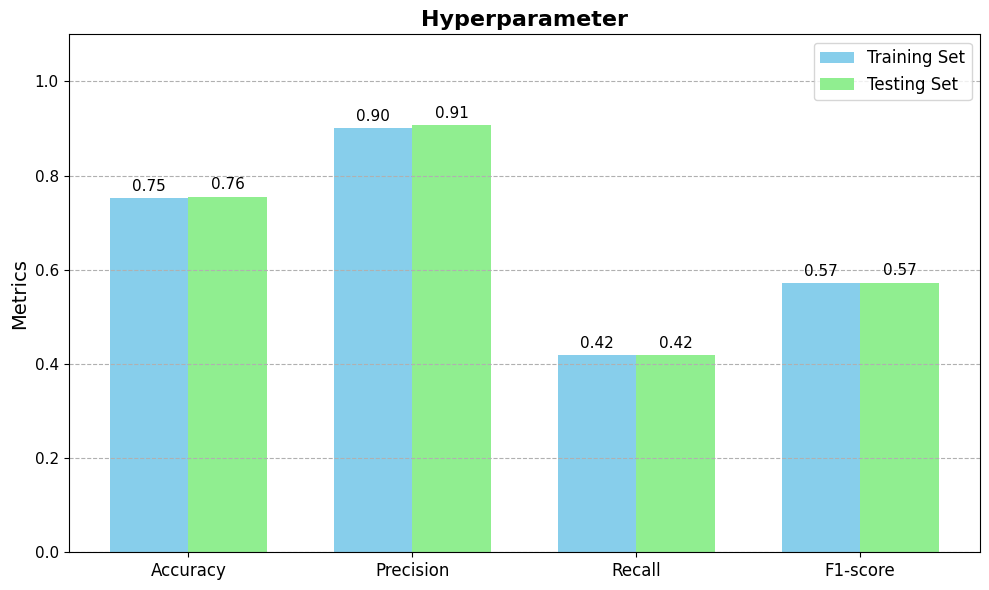

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: -0.0031
Precision: -0.0055
Recall: -0.0004
F1-Score: -0.0015


In [91]:
gb_training_metrics_after = [gb_train_accuracy, gb_train_precision, gb_train_recall, gb_train_f1]
gb_testing_metrics_after = [gb_accuracy, gb_precision, gb_recall, gb_f1]

compare_metrics(gb_training_metrics_after, gb_testing_metrics_after, title_2)
compute_metric_difference(gb_training_metrics_after, gb_testing_metrics_after)

##### Độ chênh lệch metrics trước khi sử dụng siêu tham số

In [92]:
compute_metric_difference(gb_training_metrics_before, gb_testing_metrics_before)

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.0452
Precision: 0.0936
Recall: 0.0504
F1-Score: 0.0666


#### AdaBoost

In [93]:
param_grid = {
    'base_estimator': [DecisionTreeClassifier(max_depth=1, min_samples_split=2), DecisionTreeClassifier(max_depth=2, min_samples_split=4)],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01]
}

grid_search = GridSearchCV(ada_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Bộ siêu tham số tốt nhất: ", grid_search.best_params_)

c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: Futu

Bộ siêu tham số tốt nhất:  {'base_estimator': DecisionTreeClassifier(max_depth=2, min_samples_split=4), 'learning_rate': 0.1, 'n_estimators': 100}


In [94]:
base_estimator = DecisionTreeClassifier(max_depth=2, min_samples_split=4)
ada_clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, learning_rate=0.1)

ada_clf.fit(X_train, y_train)
y_test_pred = ada_clf.predict(X_test)

ada_accuracy = accuracy_score(y_test, y_test_pred)
ada_precision = precision_score(y_test, y_test_pred)
ada_recall = recall_score(y_test, y_test_pred)
ada_f1 = f1_score(y_test, y_test_pred)

print_metrics(ada_accuracy, ada_precision, ada_recall, ada_f1)

c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7602
Precision: 0.7972
Recall: 0.5200
F1-Score: 0.6294


In [95]:
y_train_pred = ada_clf.predict(X_train)

ada_train_accuracy = accuracy_score(y_train, y_train_pred)
ada_train_precision = precision_score(y_train, y_train_pred)
ada_train_recall = recall_score(y_train, y_train_pred)
ada_train_f1 = f1_score(y_train, y_train_pred)

print_metrics(ada_train_accuracy, ada_train_precision, ada_train_recall, ada_train_f1)

Accuracy: 0.7828
Precision: 0.8507
Recall: 0.5452
F1-Score: 0.6645


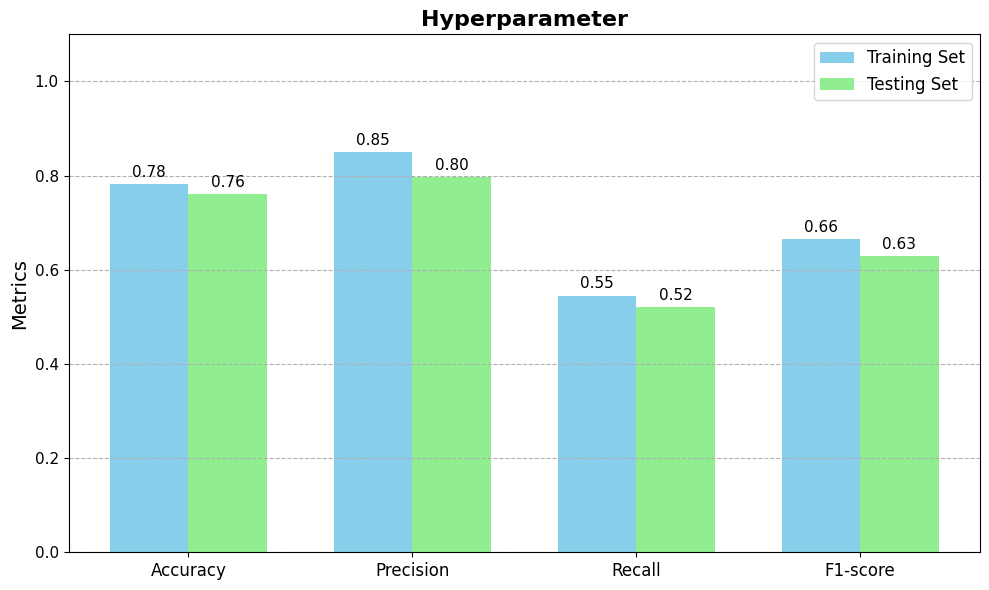

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.0226
Precision: 0.0535
Recall: 0.0252
F1-Score: 0.0351


In [96]:
ada_training_metrics_after = [ada_train_accuracy, ada_train_precision, ada_train_recall, ada_train_f1]
ada_testing_metrics_after = [ada_accuracy, ada_precision, ada_recall, ada_f1]

compare_metrics(ada_training_metrics_after, ada_testing_metrics_after, title_2)
compute_metric_difference(ada_training_metrics_after, ada_testing_metrics_after)

##### Độ chênh lệch metrics trước khi sử dụng siêu tham số

In [97]:
compute_metric_difference(ada_training_metrics_before, ada_testing_metrics_before)

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.046
Precision: 0.0894
Recall: 0.0502
F1-Score: 0.0655


#### Bagging

In [98]:
param_grid = {
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=3)],
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.8],
    'max_features': [0.5, 0.8]
}

bagging = BaggingClassifier()
grid_search = GridSearchCV(bagging, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Bộ siêu tham số tốt nhất: ", grid_search.best_params_)

c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: Futu

Bộ siêu tham số tốt nhất:  {'base_estimator': DecisionTreeClassifier(max_depth=3), 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 100}


c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [99]:
base_estimator = DecisionTreeClassifier(max_depth=3)
bg_clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=100, max_features=0.5, max_samples=0.5)

bg_clf.fit(X_train, y_train)
y_test_pred = bg_clf.predict(X_test)

bg_accuracy = accuracy_score(y_test, y_test_pred)
bg_precision = precision_score(y_test, y_test_pred)
bg_recall = recall_score(y_test, y_test_pred)
bg_f1 = f1_score(y_test, y_test_pred)

print_metrics(bg_accuracy, bg_precision, bg_recall, bg_f1)

c:\Users\Thinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7506
Precision: 0.9275
Recall: 0.3938
F1-Score: 0.5529


In [100]:
y_train_pred = bg_clf.predict(X_train)

bg_train_accuracy = accuracy_score(y_train, y_train_pred)
bg_train_precision = precision_score(y_train, y_train_pred)
bg_train_recall = recall_score(y_train, y_train_pred)
bg_train_f1 = f1_score(y_train, y_train_pred)

print_metrics(bg_train_accuracy, bg_train_precision, bg_train_recall, bg_train_f1)

Accuracy: 0.7565
Precision: 0.9451
Recall: 0.4063
F1-Score: 0.5683


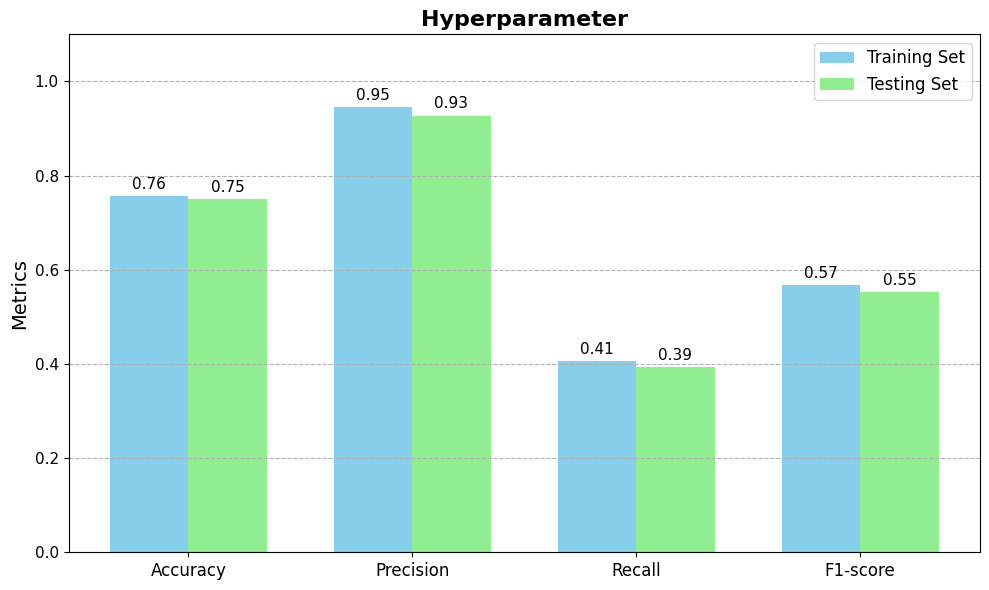

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.0059
Precision: 0.0176
Recall: 0.0124
F1-Score: 0.0154


In [101]:
bg_training_metrics_after = [bg_train_accuracy, bg_train_precision, bg_train_recall, bg_train_f1]
bg_testing_metrics_after = [bg_accuracy, bg_precision, bg_recall, bg_f1]

compare_metrics(bg_training_metrics_after, bg_testing_metrics_after, title_2)
compute_metric_difference(bg_training_metrics_after, bg_testing_metrics_after)

##### Độ chênh lệch metrics trước khi sử dụng siêu tham số

In [102]:
compute_metric_difference(bg_training_metrics_before, bg_testing_metrics_before)

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.2026
Precision: 0.2575
Recall: 0.2936
F1-Score: 0.2769


#### Random Forest

In [103]:
param_grid = {
    'n_estimators': [50, 75, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_forest = RandomForestClassifier()
grid_search = GridSearchCV(random_forest, param_grid, cv=5, n_jobs=5)
grid_search.fit(X_train, y_train)
print("Bộ siêu tham số tốt nhất: ", grid_search.best_params_)

Bộ siêu tham số tốt nhất:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [104]:
rf_clf = RandomForestClassifier(max_depth=7, min_samples_split=2, min_samples_leaf=1, n_estimators=200)

rf_clf.fit(X_train, y_train)
y_test_pred = rf_clf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_test_pred)
rf_precision = precision_score(y_test, y_test_pred)
rf_recall = recall_score(y_test, y_test_pred)
rf_f1 = f1_score(y_test, y_test_pred)

print_metrics(rf_accuracy, rf_precision, rf_recall, rf_f1)

Accuracy: 0.7627
Precision: 0.8556
Recall: 0.4738
F1-Score: 0.6099


In [105]:
y_train_pred = rf_clf.predict(X_train)

rf_train_accuracy = accuracy_score(y_train, y_train_pred)
rf_train_precision = precision_score(y_train, y_train_pred)
rf_train_recall = recall_score(y_train, y_train_pred)
rf_train_f1 = f1_score(y_train, y_train_pred)

print_metrics(rf_train_accuracy, rf_train_precision, rf_train_recall, rf_train_f1)

Accuracy: 0.8035
Precision: 0.9362
Recall: 0.5387
F1-Score: 0.6839


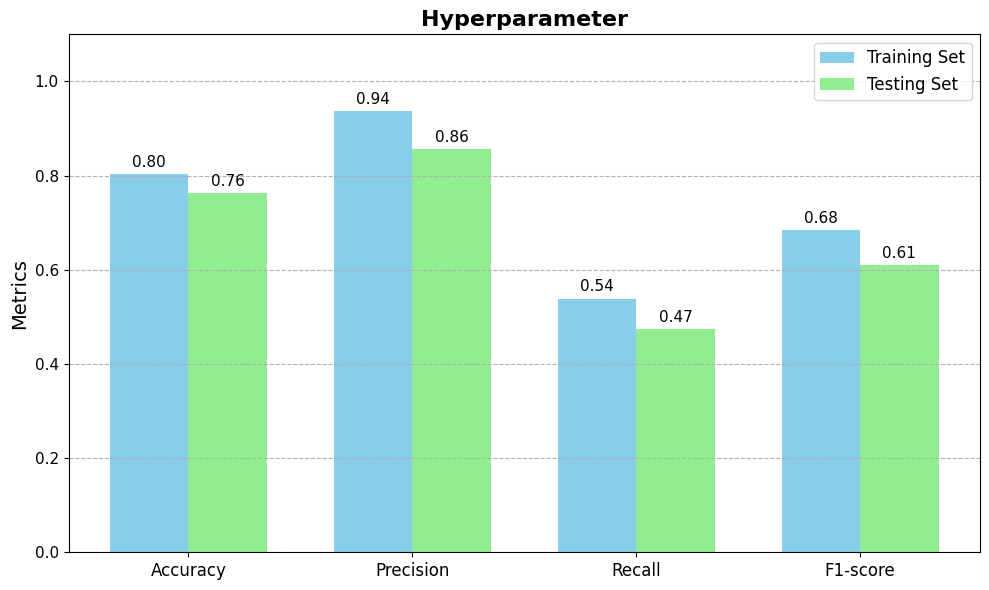

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.0409
Precision: 0.0807
Recall: 0.0648
F1-Score: 0.074


In [106]:
rf_training_metrics_after = [rf_train_accuracy, rf_train_precision, rf_train_recall, rf_train_f1]
rf_testing_metrics_after = [rf_accuracy, rf_precision, rf_recall, rf_f1]

compare_metrics(rf_training_metrics_after, rf_testing_metrics_after, title_2)
compute_metric_difference(rf_training_metrics_after, rf_testing_metrics_after)

##### Độ chênh lệch metrics trước khi sử dụng siêu tham số

In [107]:
compute_metric_difference(rf_training_metrics_before, rf_testing_metrics_before)

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.223
Precision: 0.2929
Recall: 0.297
F1-Score: 0.2952


#### Voting Classifier

In [108]:
vt_clf = VotingClassifier(
    estimators=[('rf', rf_clf), ('gb', gb_clf), ('lr', lr_clf)]
)

param_grid = {
    'rf__n_estimators': [75, 100, 200, 300],
    'gb__learning_rate': [0.1, 0.01, 0.05, 0.001],
    'lr__C': [1, 5, 7, 10],
}

grid_search = GridSearchCV(estimator=vt_clf, param_grid=param_grid, cv=5, n_jobs=4)
grid_search.fit(X_train, y_train)

print("Bộ siêu tham số tốt nhất: ", grid_search.best_params_) 

Bộ siêu tham số tốt nhất:  {'gb__learning_rate': 0.1, 'lr__C': 10, 'rf__n_estimators': 200}


In [109]:
rf_clf = RandomForestClassifier(n_estimators=300, max_depth=3)
gb_clf = GradientBoostingClassifier(max_depth=3, n_estimators=75, learning_rate=0.1)
lr_clf = LogisticRegression(C=1)

vt_clf = VotingClassifier(
    estimators=[('rf', rf_clf), ('gb', gb_clf), ('lr', lr_clf)],
    voting='hard'
)

vt_clf.fit(X_train, y_train)
y_test_pred = vt_clf.predict(X_test)

vt_accuracy = accuracy_score(y_test, y_test_pred)
vt_precision = precision_score(y_test, y_test_pred)
vt_recall = recall_score(y_test, y_test_pred)
vt_f1 = f1_score(y_test, y_test_pred)

print_metrics(vt_accuracy, vt_precision, vt_recall, vt_f1)

Accuracy: 0.7530
Precision: 0.8125
Recall: 0.4800
F1-Score: 0.6035


In [110]:
y_train_pred = vt_clf.predict(X_train)

vt_train_accuracy = accuracy_score(y_train, y_train_pred)
vt_train_precision = precision_score(y_train, y_train_pred)
vt_train_recall = recall_score(y_train, y_train_pred)
vt_train_f1 = f1_score(y_train, y_train_pred)

print_metrics(vt_train_accuracy, vt_train_precision, vt_train_recall, vt_train_f1)

Accuracy: 0.7746
Precision: 0.8847
Recall: 0.4928
F1-Score: 0.6330


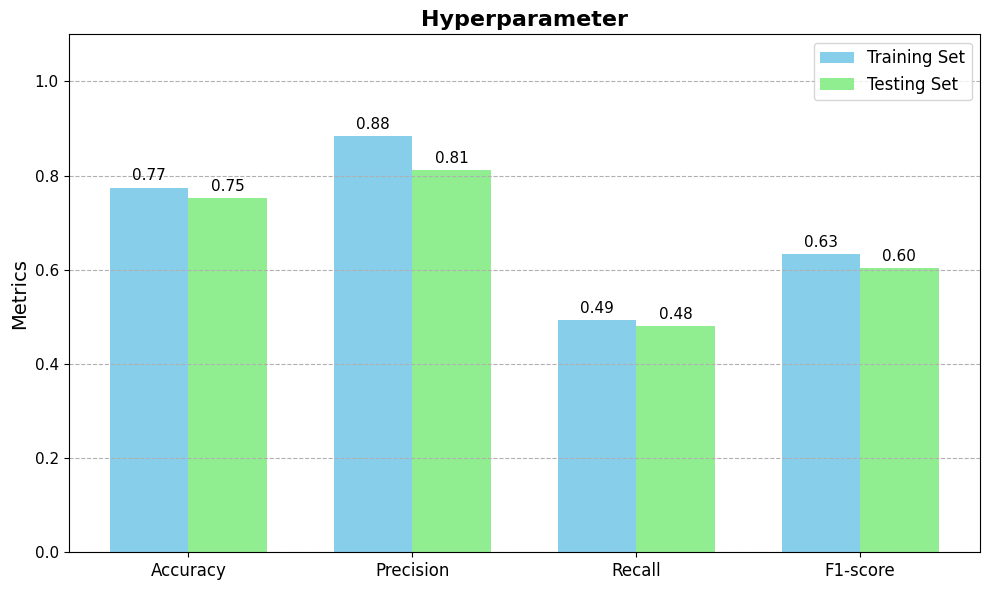

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.0215
Precision: 0.0722
Recall: 0.0128
F1-Score: 0.0295


In [111]:
vt_training_metrics_after = [vt_train_accuracy, vt_train_precision, vt_train_recall, vt_train_f1]
vt_testing_metrics_after = [vt_accuracy, vt_precision, vt_recall, vt_f1]

compare_metrics(vt_training_metrics_after, vt_testing_metrics_after, title_2)
compute_metric_difference(vt_training_metrics_after, vt_testing_metrics_after)

##### Độ chênh lệch metrics trước khi sử dụng siêu tham số

In [112]:
compute_metric_difference(vt_training_metrics_before, vt_testing_metrics_before)

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.0714
Precision: 0.1471
Recall: 0.0709
F1-Score: 0.0996


#### Stacking

In [113]:
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()
lr_clf = LogisticRegression()

st_clf = StackingClassifier(
    estimators=[('rf', rf_clf), ('gb', gb_clf)],
    final_estimator=lr_clf
)

param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'gb__learning_rate': [0.01, 0.05, 0.1],
    'final_estimator__C': [0.1, 1, 10],
}

grid_search = GridSearchCV(estimator=st_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Bộ siêu tham số tốt nhất: ", grid_search.best_params_) 

Bộ siêu tham số tốt nhất:  {'final_estimator__C': 1, 'gb__learning_rate': 0.1, 'rf__n_estimators': 200}


In [114]:
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('gb', GradientBoostingClassifier(learning_rate=0.1))
]

lr_clf = LogisticRegression(C=10)

st_clf = StackingClassifier(estimators=base_models, final_estimator=lr_clf)

st_clf.fit(X_train, y_train)

y_test_pred = st_clf.predict(X_test)

st_accuracy = accuracy_score(y_test, y_test_pred)
st_precision = precision_score(y_test, y_test_pred)
st_recall = recall_score(y_test, y_test_pred)
st_f1 = f1_score(y_test, y_test_pred)

print_metrics(st_accuracy, st_precision, st_recall, st_f1)

Accuracy: 0.7602
Precision: 0.7561
Recall: 0.5723
F1-Score: 0.6515


In [115]:
y_train_pred = st_clf.predict(X_train)

st_train_accuracy = accuracy_score(y_train, y_train_pred)
st_train_precision = precision_score(y_train, y_train_pred)
st_train_recall = recall_score(y_train, y_train_pred)
st_train_f1 = f1_score(y_train, y_train_pred)

print_metrics(st_train_accuracy, st_train_precision, st_train_recall, st_train_f1)

Accuracy: 0.7637
Precision: 0.7713
Recall: 0.5701
F1-Score: 0.6556


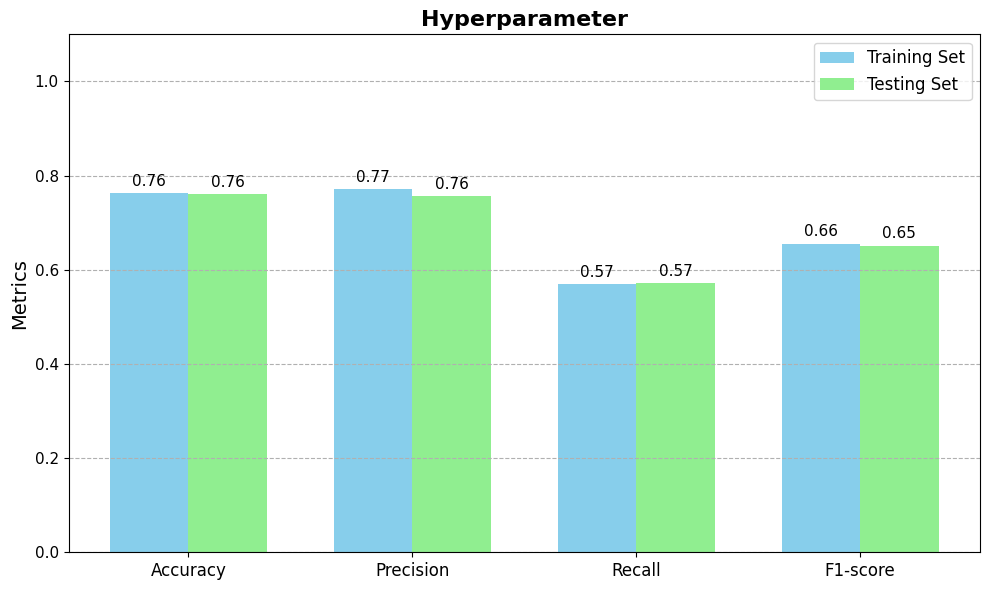

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.0035
Precision: 0.0152
Recall: -0.0022
F1-Score: 0.0041


In [116]:
st_training_metrics_after = [st_train_accuracy, st_train_precision, st_train_recall, st_train_f1]
st_testing_metrics_after = [st_accuracy, st_precision, st_recall, st_f1]

compare_metrics(st_training_metrics_after, st_testing_metrics_after, title_2)
compute_metric_difference(st_training_metrics_after, st_testing_metrics_after)

##### Độ chênh lệch metrics trước khi sử dụng siêu tham số

In [117]:
compute_metric_difference(st_training_metrics_before, st_testing_metrics_before)

Độ chêch lệch giữa các giá trị metrics trên tập huấn luyện và tập kiểm tra: 
Accuracy: 0.0212
Precision: 0.0467
Recall: 0.0192
F1-Score: 0.0296


### Các mô hình neural network


#### Feed Forward Neural Network

- Với mô hình FFNN, em đã thay đổi áp dụng các phương thức Regularization L1L2, tăng thêm các lớp và số lượng Neural, dropout để giảm thiểu tình trạng Overfit cũng như tối ưu hiệu suất mô hình.
- Sau khi ứng dụng có thể thấy sự thay đổi đáng kể trong Accuracy

In [118]:
model_FFNW = tf.keras.Sequential([
    tf.keras.layers.Dense(64, kernel_initializer='uniform', activation='relu', kernel_regularizer=regularizers.L1L2(0.005)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, kernel_initializer='uniform', activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, kernel_initializer='uniform', activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, kernel_initializer='uniform', activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, kernel_initializer='uniform', activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, kernel_initializer='uniform', activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, kernel_initializer='uniform', activation='sigmoid')
])

model_FFNW.compile(loss="binary_crossentropy", metrics='accuracy', optimizer='adam')

history_FFNW_after = model_FFNW.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/100


61/61 [==============================] - 2s 5ms/step - loss: 0.7257 - accuracy: 0.6044 - val_loss: 0.6742 - val_accuracy: 0.6084
Epoch 2/100
61/61 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.6055 - val_loss: 0.6656 - val_accuracy: 0.6084
Epoch 3/100
61/61 [==============================] - 0s 3ms/step - loss: 0.6464 - accuracy: 0.6055 - val_loss: 0.6189 - val_accuracy: 0.6084
Epoch 4/100
61/61 [==============================] - 0s 3ms/step - loss: 0.6208 - accuracy: 0.6360 - val_loss: 0.6082 - val_accuracy: 0.7120
Epoch 5/100
61/61 [==============================] - 0s 3ms/step - loss: 0.5953 - accuracy: 0.7492 - val_loss: 0.5746 - val_accuracy: 0.7253
Epoch 6/100
61/61 [==============================] - 0s 3ms/step - loss: 0.5552 - accuracy: 0.7523 - val_loss: 0.5370 - val_accuracy: 0.7542
Epoch 7/100
61/61 [==============================] - 0s 3ms/step - loss: 0.5369 - accuracy: 0.7580 - val_loss: 0.5310 - val_accuracy: 0.7542
Epoch 8/100
61/61 [======

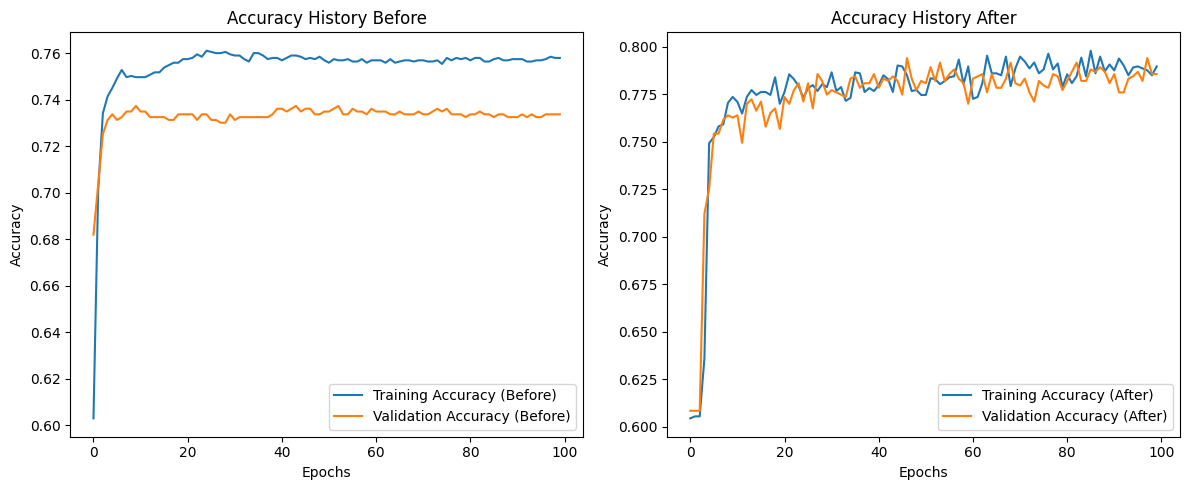

In [119]:
plot_accuracy_history_comparision(history_before=history_FFNW_before, history_after=history_FFNW_after)

#### Recurrent Neural Network

- Với mô hình FFNN, em đã thay đổi áp dụng các phương thức Regularization L1L2, tăng thêm các lớp và số lượng Neural, dropout để giảm thiểu tình trạng Overfit cũng như tối ưu hiệu suất mô hình.
- Sau khi ứng dụng có thể thấy sự thay đổi đáng kể trong Accuracy

Epoch 1/100
61/61 [==============================] - 4s 16ms/step - loss: 0.8007 - accuracy: 0.5419 - val_loss: 0.7479 - val_accuracy: 0.6084
Epoch 2/100
61/61 [==============================] - 1s 9ms/step - loss: 0.7353 - accuracy: 0.6236 - val_loss: 0.7203 - val_accuracy: 0.6422
Epoch 3/100
61/61 [==============================] - 1s 9ms/step - loss: 0.6995 - accuracy: 0.6272 - val_loss: 0.6803 - val_accuracy: 0.6831
Epoch 4/100
61/61 [==============================] - 1s 9ms/step - loss: 0.6823 - accuracy: 0.6515 - val_loss: 0.6461 - val_accuracy: 0.6988
Epoch 5/100
61/61 [==============================] - 1s 9ms/step - loss: 0.6367 - accuracy: 0.7042 - val_loss: 0.5995 - val_accuracy: 0.7422
Epoch 6/100
61/61 [==============================] - 1s 9ms/step - loss: 0.6128 - accuracy: 0.7177 - val_loss: 0.6113 - val_accuracy: 0.7398
Epoch 7/100
61/61 [==============================] - 1s 10ms/step - loss: 0.5858 - accuracy: 0.7187 - val_loss: 0.5573 - val_accuracy: 0.7530
Epoch 8/100

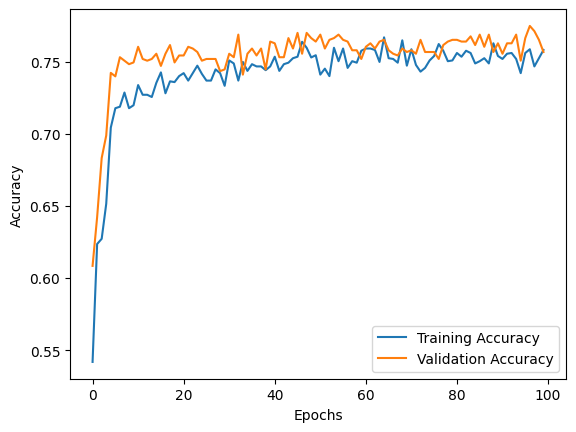

In [120]:

model_RNN = Sequential([
    tf.keras.layers.SimpleRNN(units = 32, activation='relu', return_sequences=True, input_shape= (X_train.shape[1],1), dropout=0.15, kernel_regularizer=regularizers.L1L2(0.02)),
    tf.keras.layers.LSTM(units = 32, activation='relu', return_sequences=True,  dropout=0.2),
    # tf.keras.layers.SimpleRNN(units = 32, activation='relu', return_sequences=True,  dropout=0.2),
    # tf.keras.layers.SimpleRNN(units = 32, activation='relu', return_sequences=True,  dropout=0.15),
    # tf.keras.layers.SimpleRNN(units = 32, activation='relu', return_sequences=True,  dropout=0.15),
    # tf.keras.layers.SimpleRNN(units = 16, activation='relu', return_sequences=True,  dropout=0.15),
    # tf.keras.layers.SimpleRNN(units = 16, activation='relu', return_sequences=True,  dropout=0.15),
    tf.keras.layers.SimpleRNN(units = 1, activation='sigmoid'),
])

model_RNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_RNN_after = model_RNN.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

plot_accuracy_history(history_RNN_after)


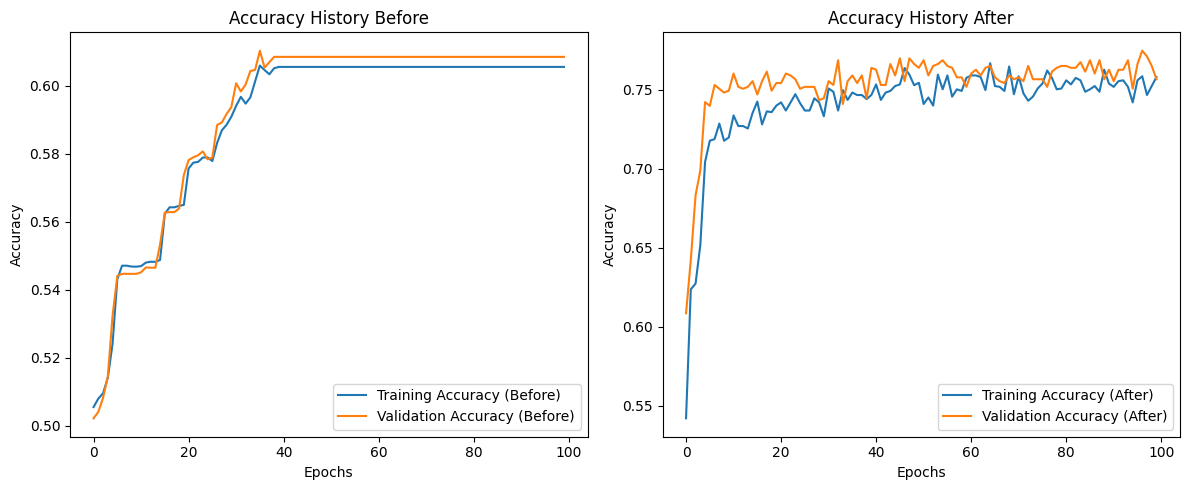

In [121]:
plot_accuracy_history_comparision(history_before=history_RNN_before, history_after=history_RNN_after)

## Phần 5: Sau khi huấn luyện xong mô hình thì muốn cải thiện độ chính xác, ta sẽ làm gì để giải quyết nó? Phân tích các trường hợp sai, đề ra giải pháp và thực hiện nó, sau đó đánh giá xem có cải tiến so với trước không. 

- Xuyên suốt bài tập cuối kỳ em đã áp dụng Feature Selection bằng phương pháp Pearson Correlation để có thể kiểm tra sự tương quan giữa các Features, cũng như là để xem các Features Input ảnh hưởng thế nào đến kết quả đầu ra.
- Phương pháp Pearson Correlation đã được áp dụng để loại bỏ các Feature có corr() > 0.5 giúp mô hình có thể ổn định.

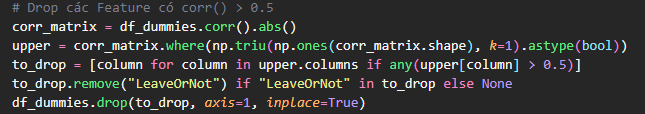

- Có rẩt nhiều phương pháp để có thể cải thiện hiệu suất của một mô hình học máy, và trong bài đồ án lần này phương pháp chính mà chúng em đã lựa chọn sử dụng chính là Pearson Correlation như đã nói ở phía trên kết hợp với phương pháp Hyperparameter Tuning để giúp mô hình đạt được hiệu quả tối ưu nhất.

### Các mô hình cơ bản:

- Ở các mô hình cơ bản em đã sử dụng phương pháp Hyperparameter Tuning:

#### kNN

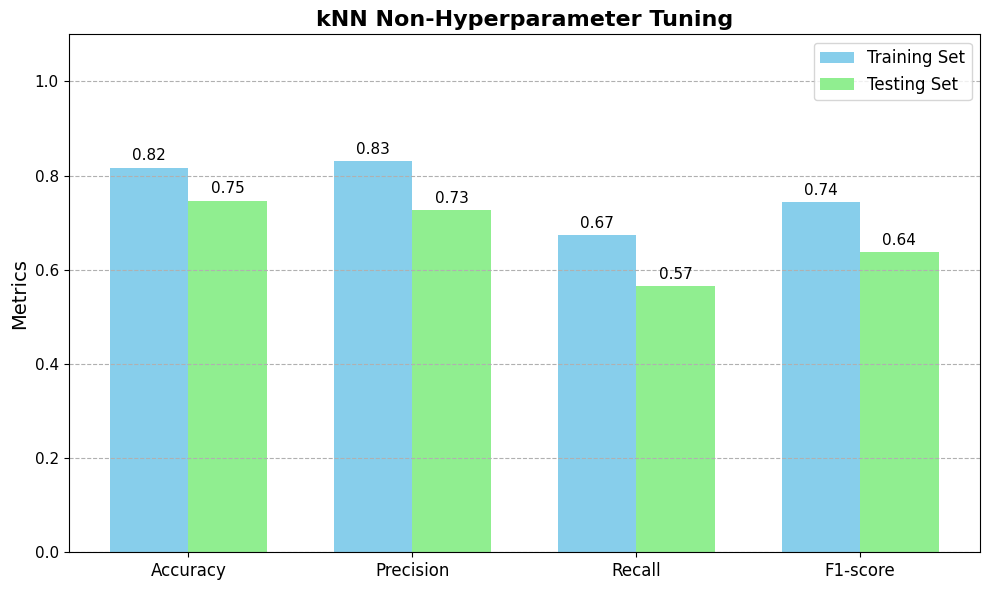
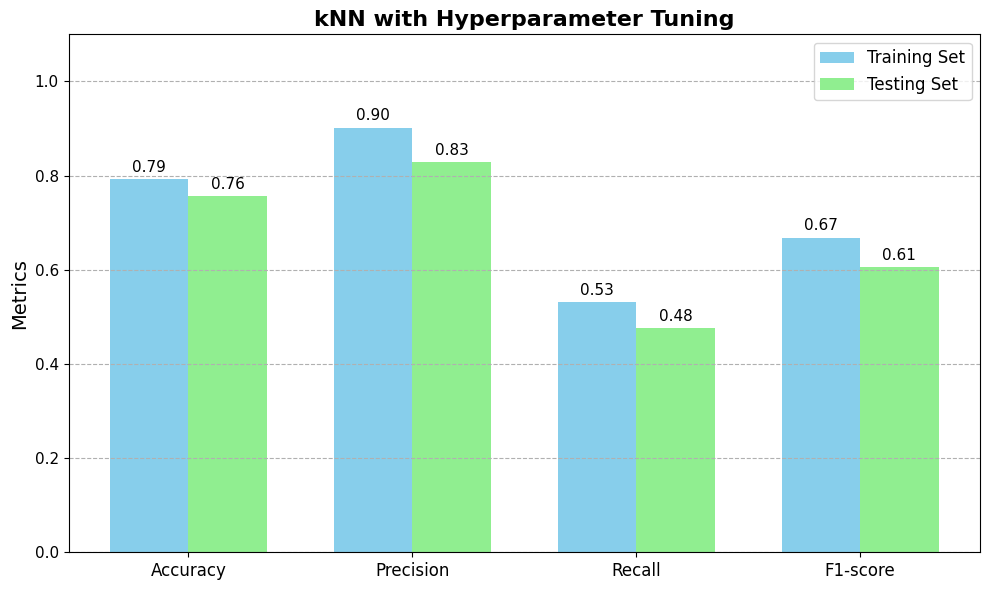

#### Logistic Regression

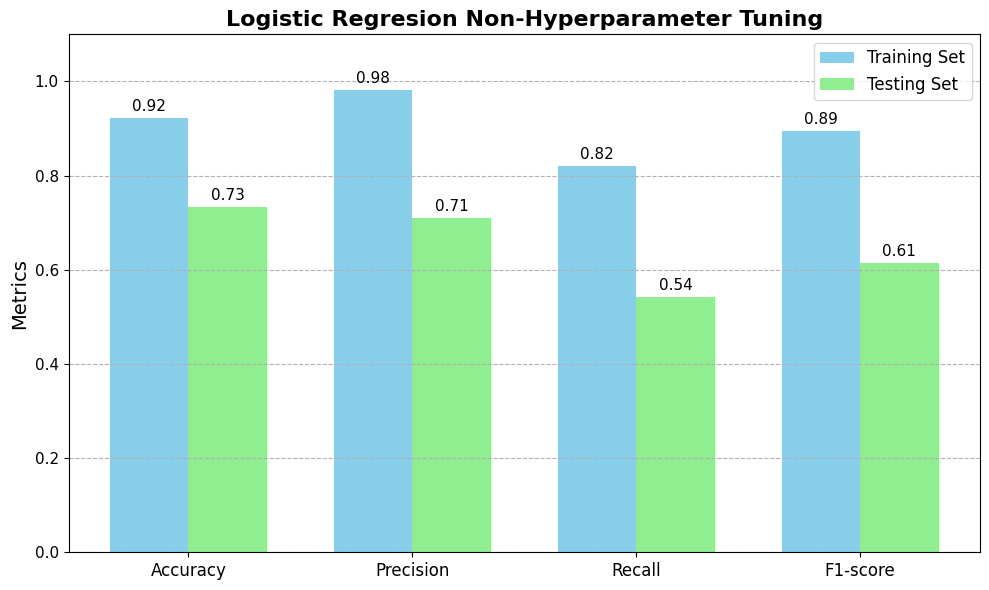 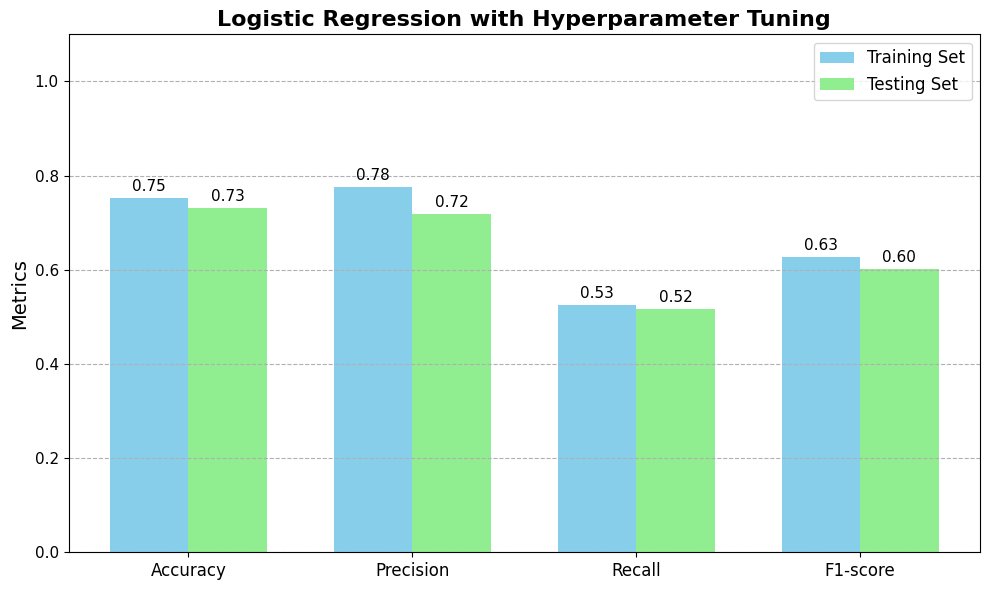

#### Decision Tree

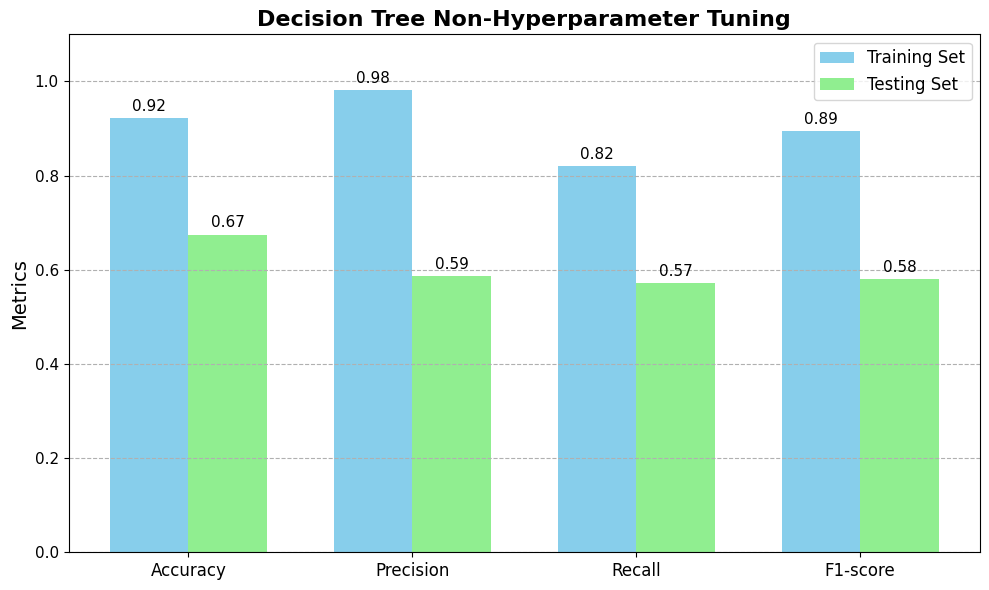
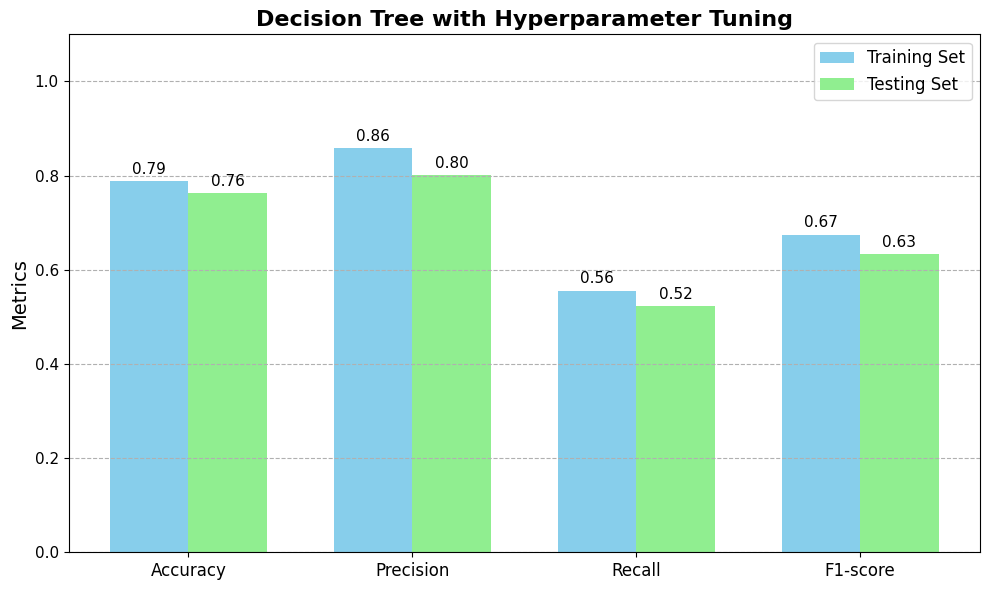

#### Naive Bayes

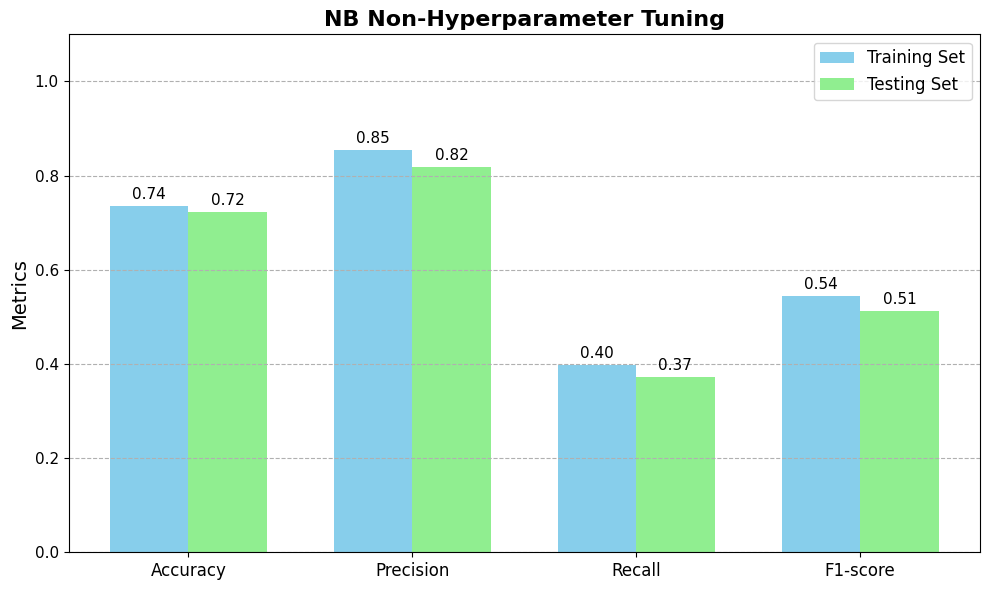  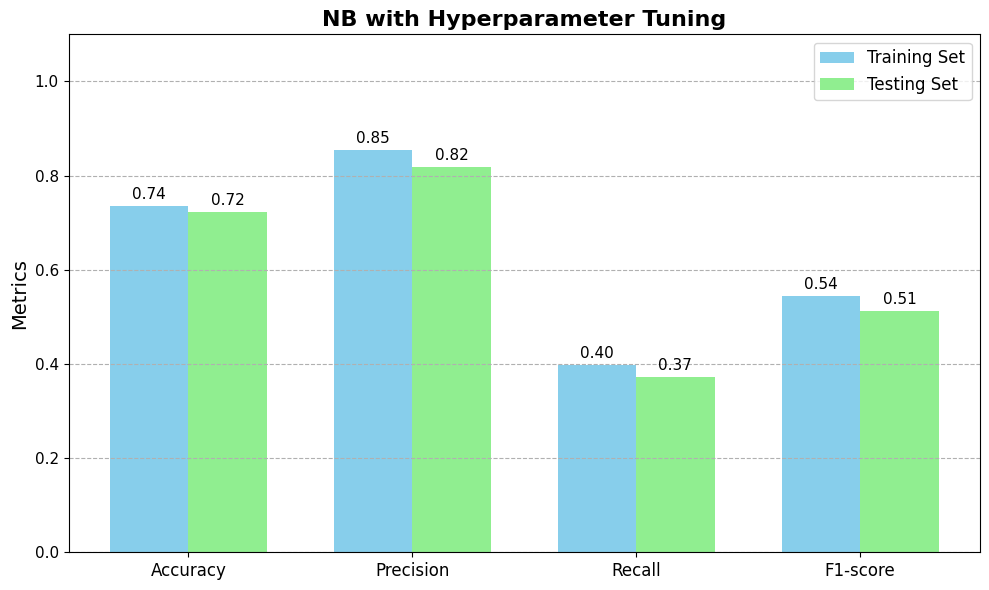

#### SVM

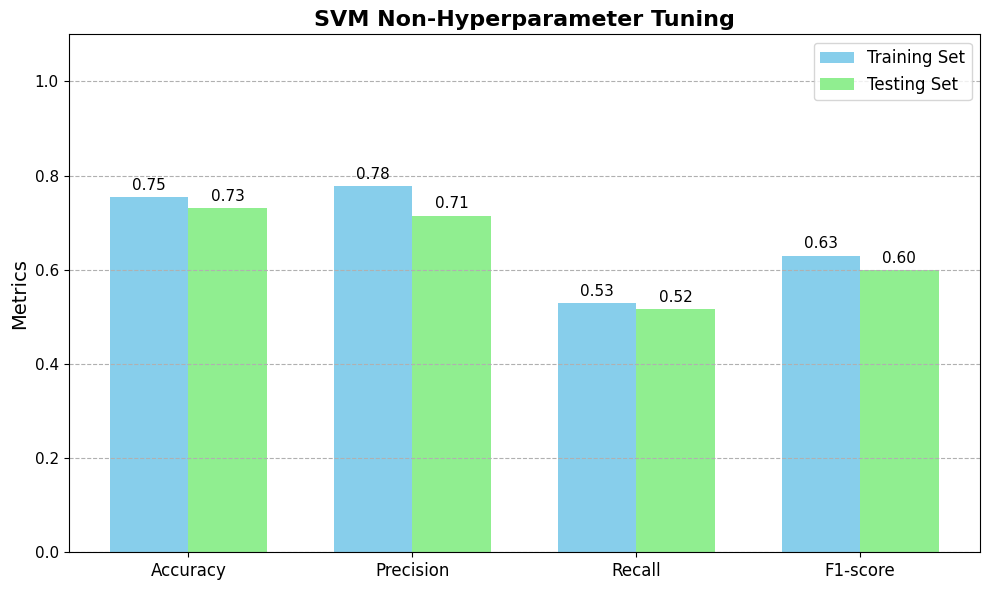 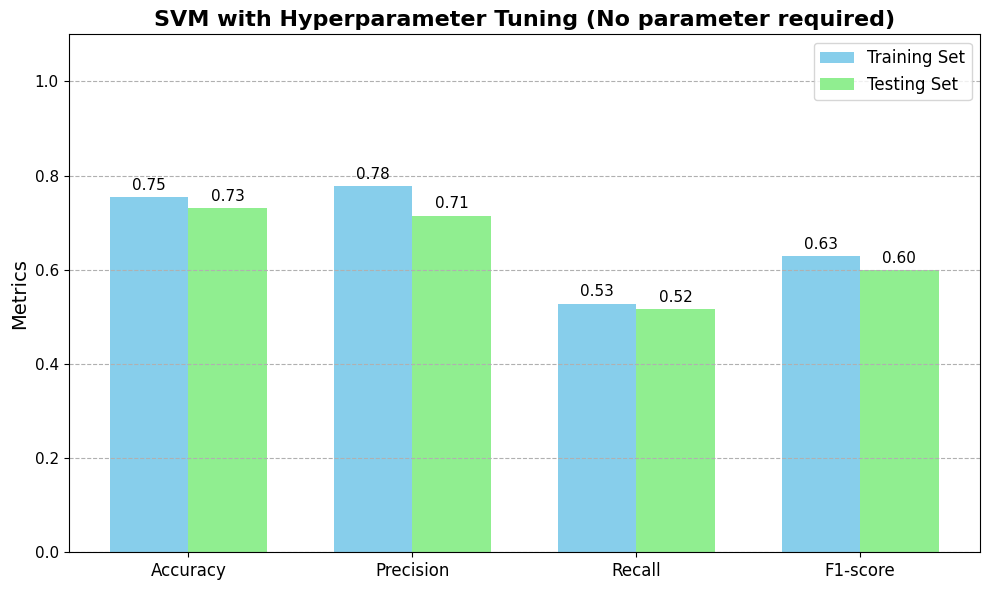

### Các mô hình Essembled

Sau khi huấn luyện các mô hình, em đã sử dụng GridSearchCV để tìm ra các hyperparameter (siêu tham số) phù hợp cho từng mô hình.

#### Gradient Boosting

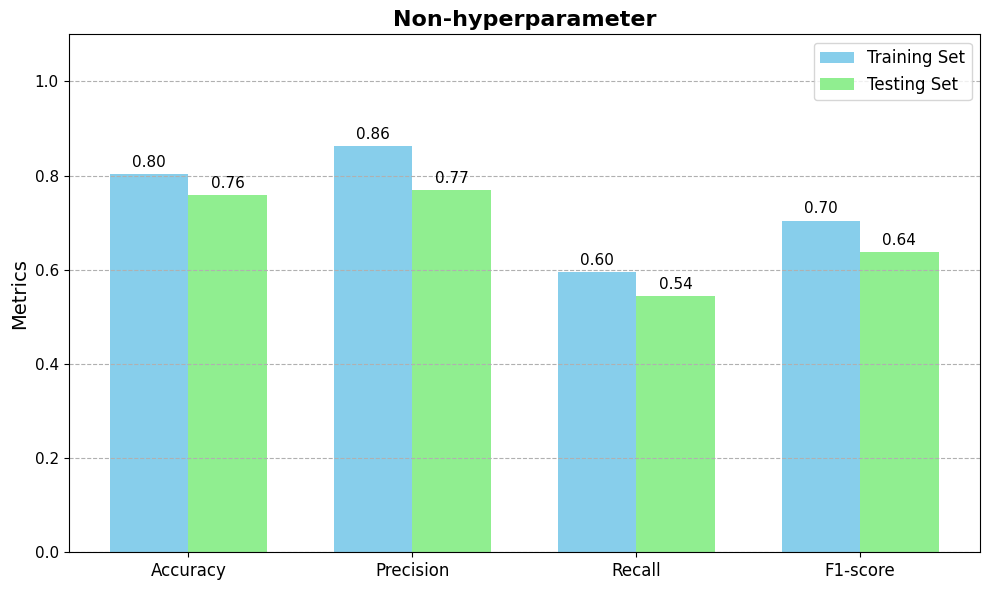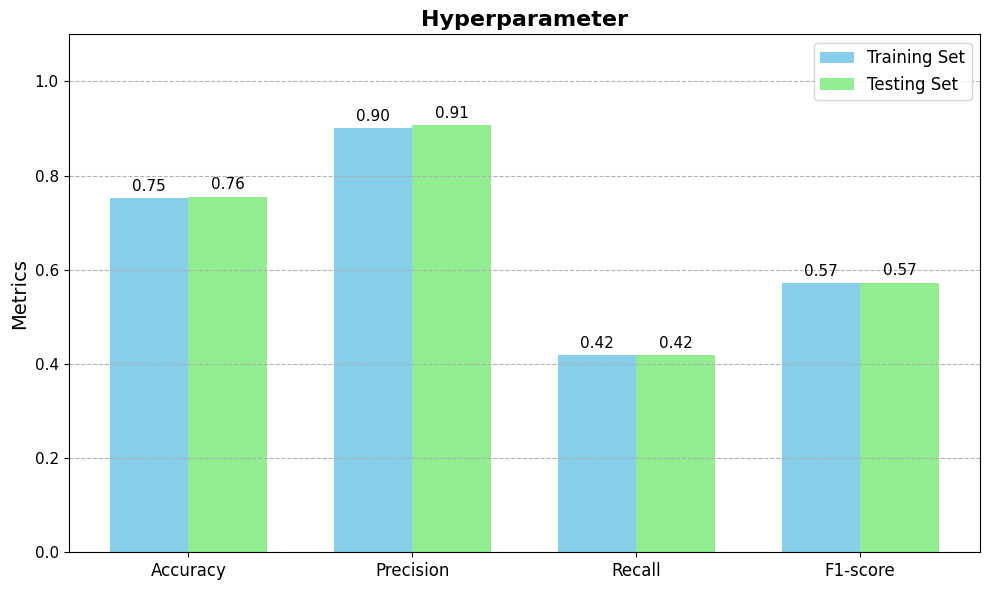

#### AdaBoost

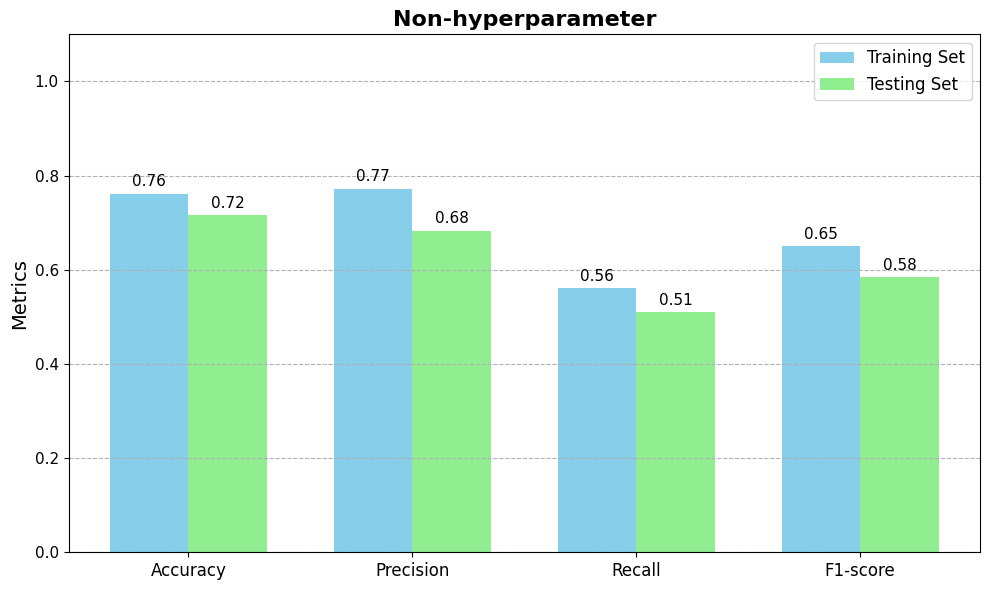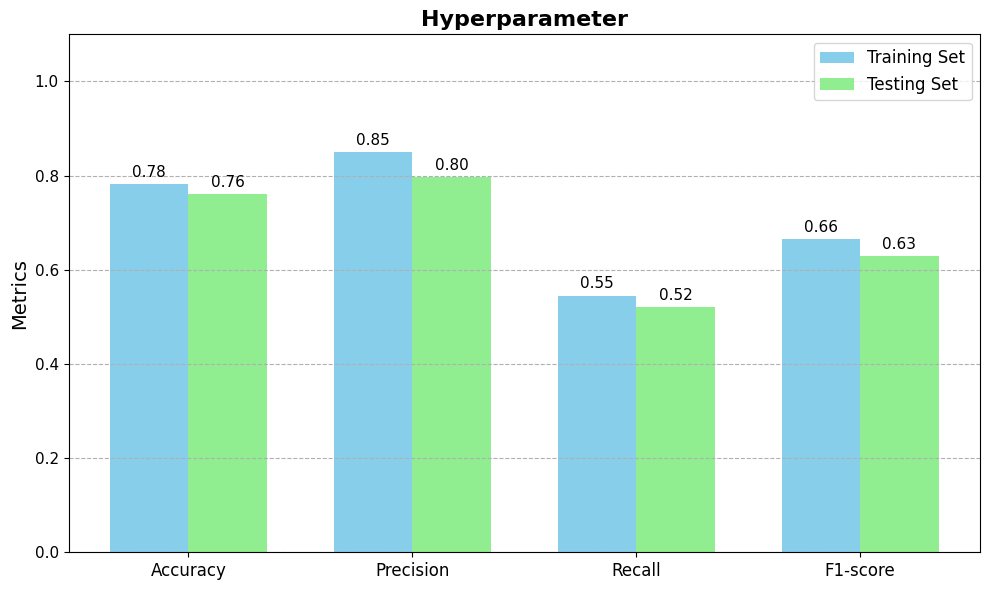

#### Bagging

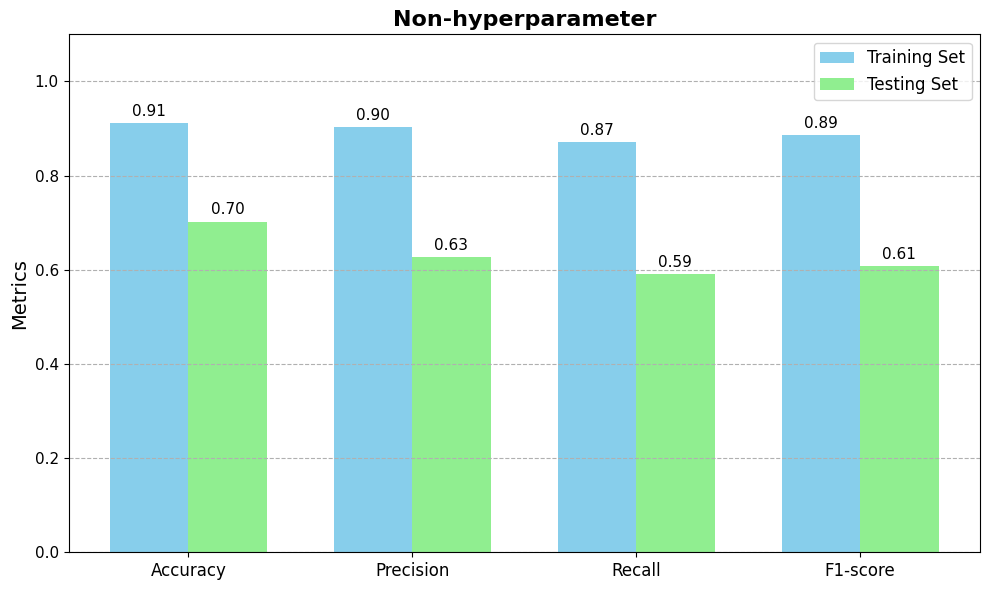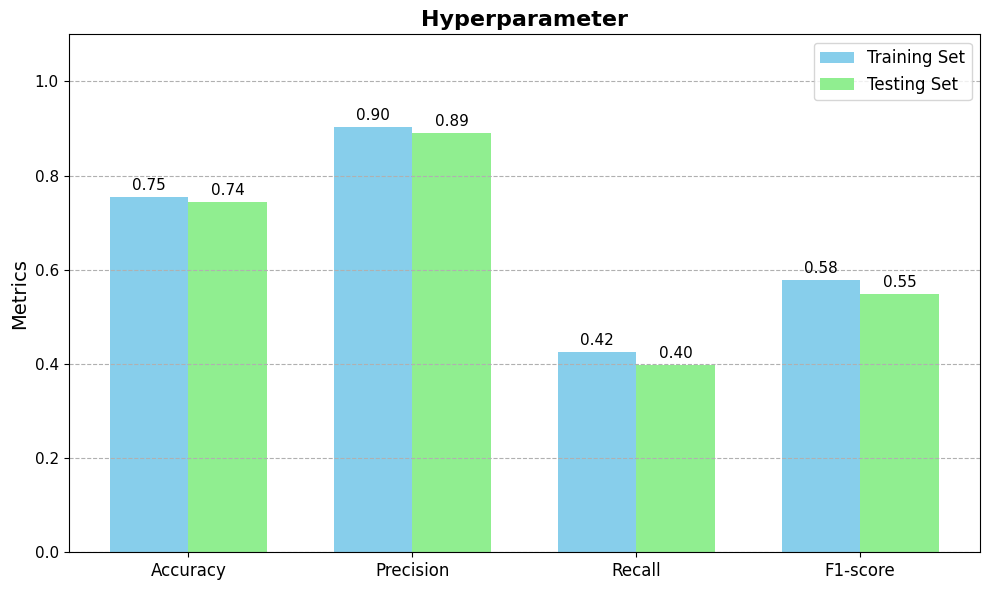

#### Random Forest

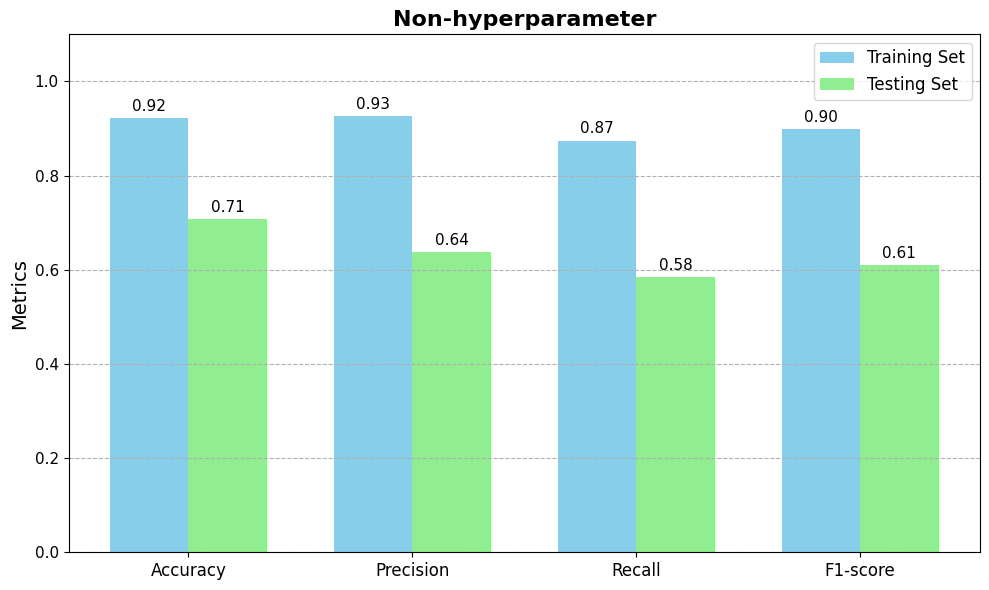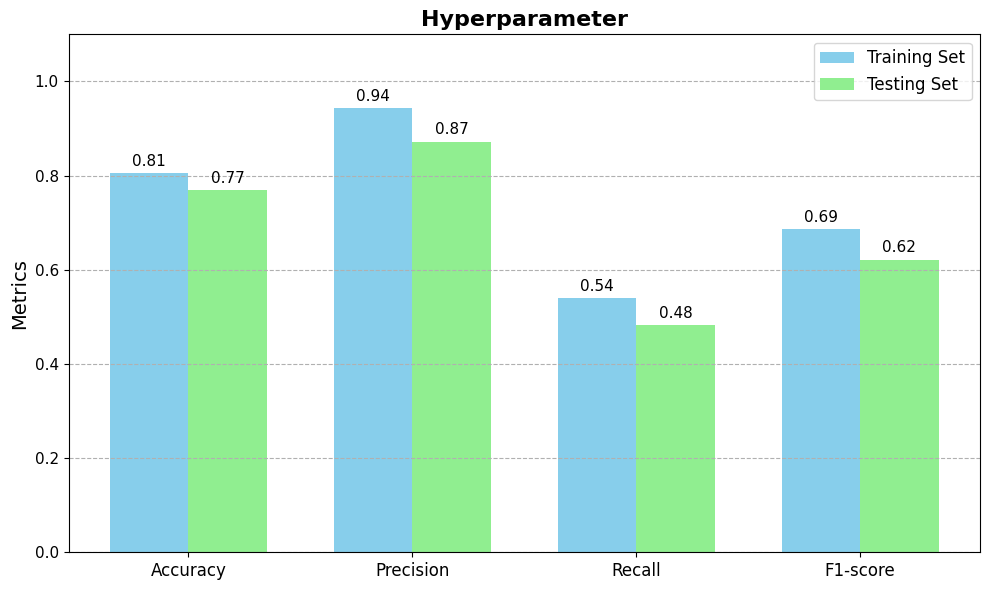

#### Voting 

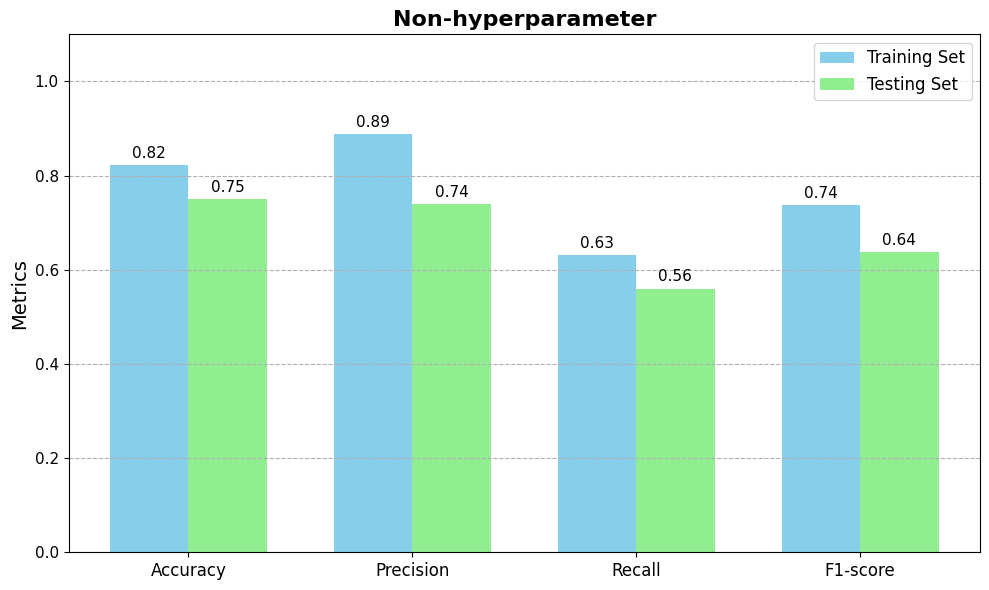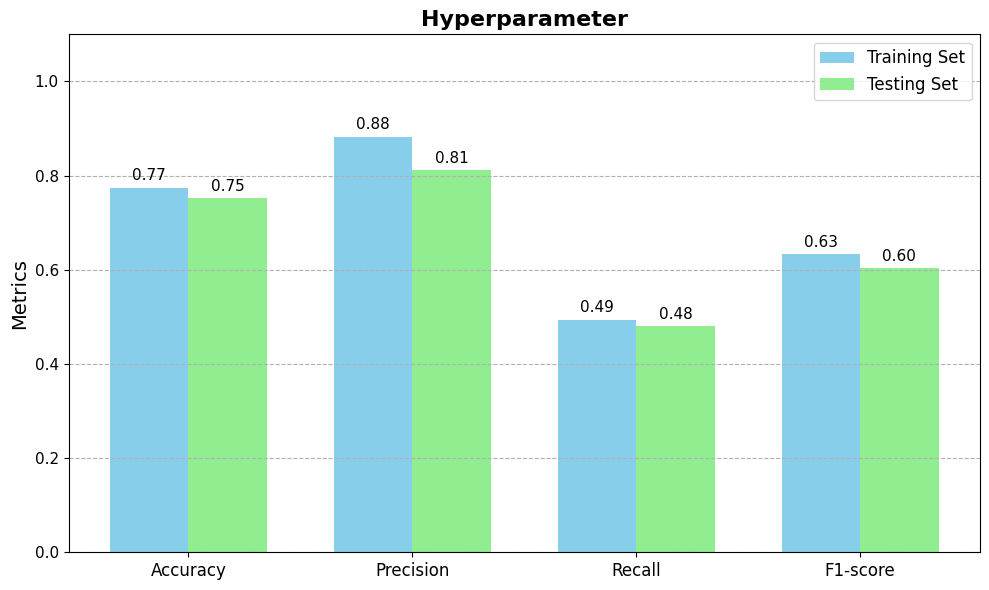

#### Stacking

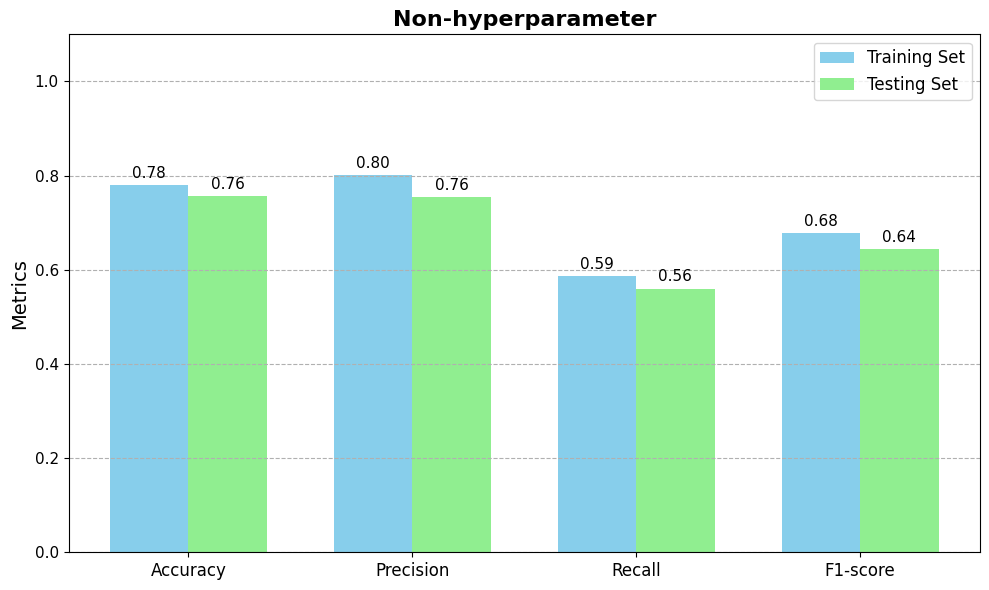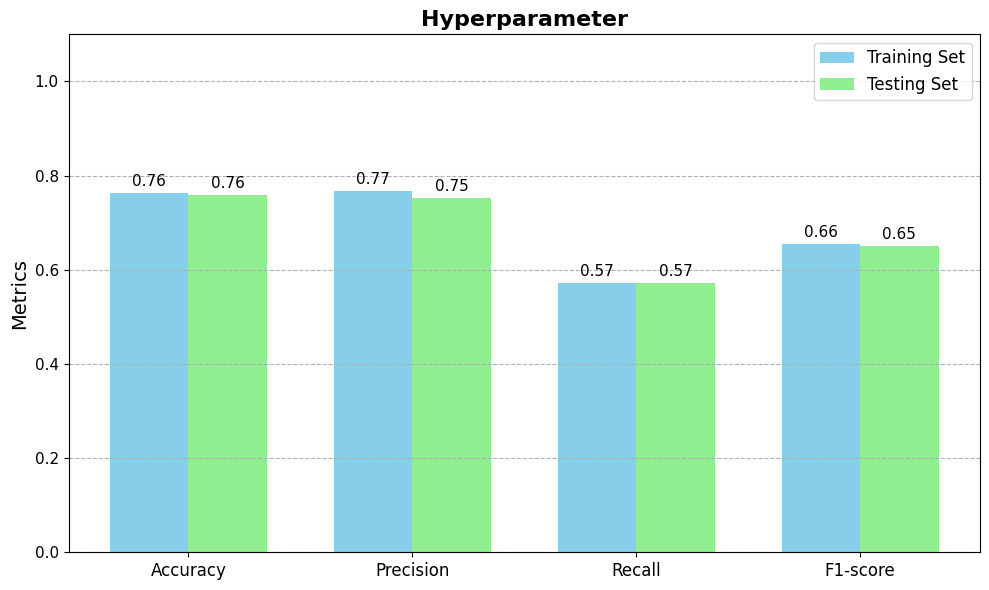

### Đánh giá tổng quan của các mô hình cơ bản và Essembled

- Trước khi sử dụng các siêu tham số để huấn luyện mô hình (đối với những biểu đồ bên trái):

    - Ta dễ nhận thấy các giá trị testing metrics như accuracy, precision, recall và F1-Score thấp hơn so với giá trị training metrics, đó 'có thể' là dấu hiệu của hiện tượng underfitting nhưng, không thể nhận định rằng kết luận này hoàn toàn đúng. 
    - Thực tế, các giá trị testing metrics này thấp hơn giá trị training cũng có thể do mô hình chưa được điều chỉnh tối ưu để đạt hiệu suất tốt trên tập kiểm tra. Chính vì thế, em đã sử dụng các siêu tham số phù hợp để điều chỉnh lại các mô hình trên.

- Sau khi huấn luyện các mô hình với siêu tham số phù hợp (đối với những biểu đồ bên dưới):

    - Độ chênh lệch giữa testing metrics và training metrics giảm đi đáng kể, điều này cho thấy mô hình đã học được cách tổng quát hóa tốt hơn cho dữ liệu mới cũng như hiệu suất tốt hơn trên tập kiểm tra.

    - Việc giảm chênh lệch giữa testing metrics và training metrics cũng cho thấy mô hình không bị ảnh hưởng quá nhiều bởi các biến động trong dữ liệu huấn luyện. Điều này làm giảm nguy cơ mô hình bị overfitting và tăng tính khả thi và tin cậy của mô hình khi áp dụng cho dữ liệu thực tế.

    - Bên cạnh đó, các giá trị recall và F1-score có xu hướng giảm đồng đều cho thấy các mô hình đã trở nên cân bằng hơn giữa việc tìm ra các mẫu true positive (recall) và độ chính xác (precision).

### Các mô hình Neural Network:

- Đầu tiên ta cần phải hiểu trong NN có 2 khái niệm khá quan trọng đó chính là Variance và Bias.
    - Variance chính là sai số accuracy giữa tập train và tập test: Variance = accuracy_train - accuracy_test
    - Bias mô tả khả năng học của mô hình, được tính: Bias = 1 - accuracy_test

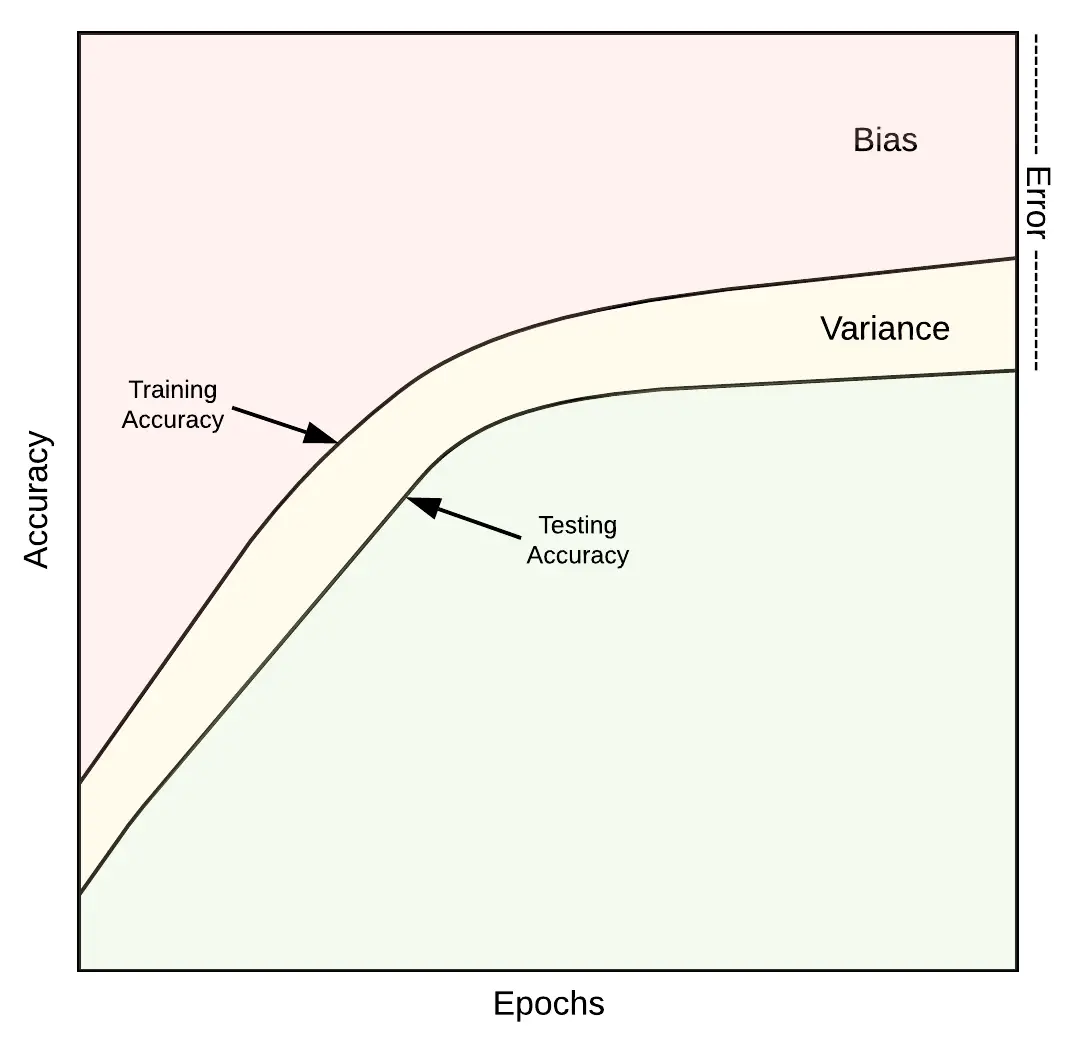

#### Với mô hình FFNN:

- Tại mô hình FFNN, dựa vào kết quả ban đầu thu được:

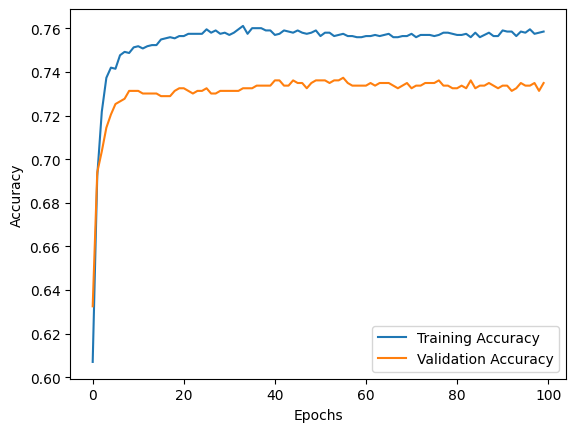

- Em đã xác định mình cần điều chỉnh bằng cách Giảm cả Bias và Variance để có thể tối ưu khả năng học của mô hình và tăng độ chính xác, do đó em đã thực hiện các bước sau: 
    - Increase model size => Giảm Bias (Tăng số lớp lẫn số node trong mỗi lớp).
    - Thêm Regularization => Giảm Variance (0.25)
    - Giảm Regularization => Giảm Bias (Giảm xuống còn 0.05)
    - Thay đổi các cấu trúc => Giảm Bias (Lựa chọn Optimizer, lựa chọn hàm activation Relu)
    - Sử dụng Feature Selection => Giảm Variance (Sử dụng Pearson Correlation để loại bỏ các Feature có Correlation trên 0.5)
- Và đây là kết quả sau thi thu lại được:

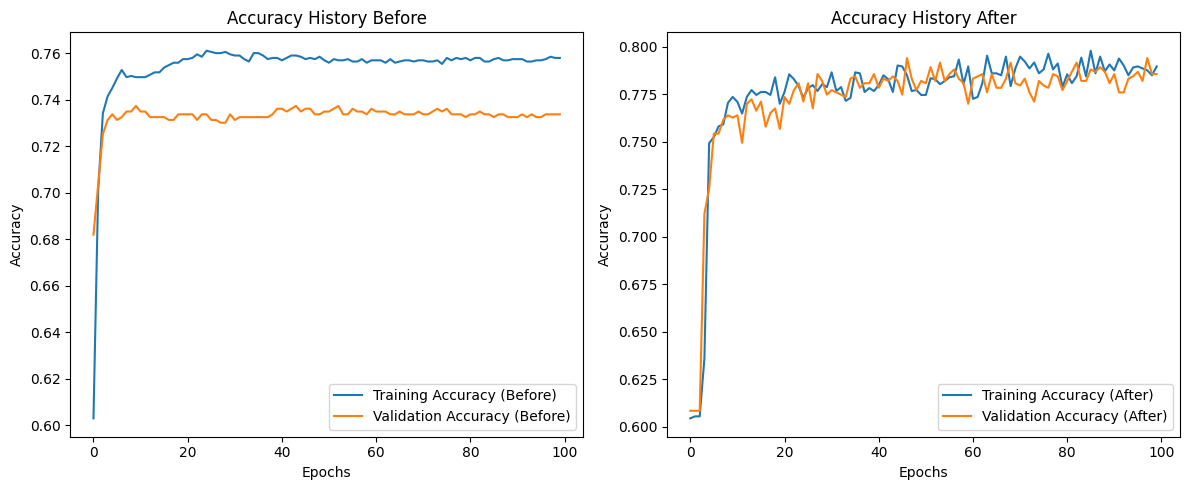

In [122]:
plot_accuracy_history_comparision(history_before=history_FFNW_before, history_after=history_FFNW_after)

- Có thể thấy Accuracy đã tăng lên đáng kể và sự sai lệch giữa Accuracy giữa tập train và tập test đã đồng bộ với nhau.

#### Với mô hình RNN:

- Kết quả thu được ban đầu của mô hình RNN:

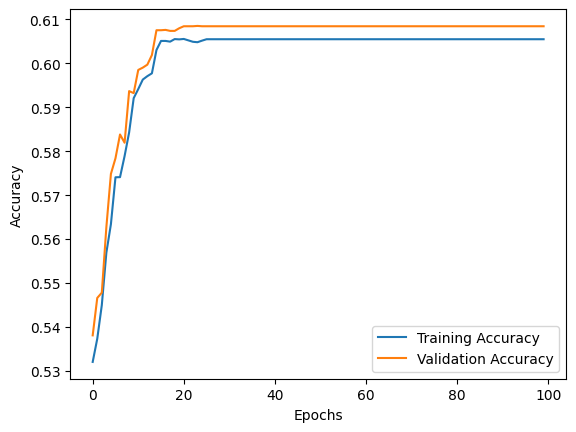  

- Dựa vào kết quả thu được ta có thể thấy cần phải giảm Bias, đây là cách thức em đã sử dụng:
    - Tăng kích thước của mô hình => Giảm Bias (Thêm nhiều lớp và điều chỉnh số Neural ở mỗi lớp)
    - Thay đổi cấu trức => Giảm Bias (Lựa chọn các hàm kích hoạt và Optimizer)
    - Thêm và điều chỉnh Regularization L1L2 => Cùng giảm Bias và Variance (lựa chọn 0.02)
- Sau cùng đây là kêt quả thu lại được, có thể thấy sự thay đổi đáng kể trong Accuracy

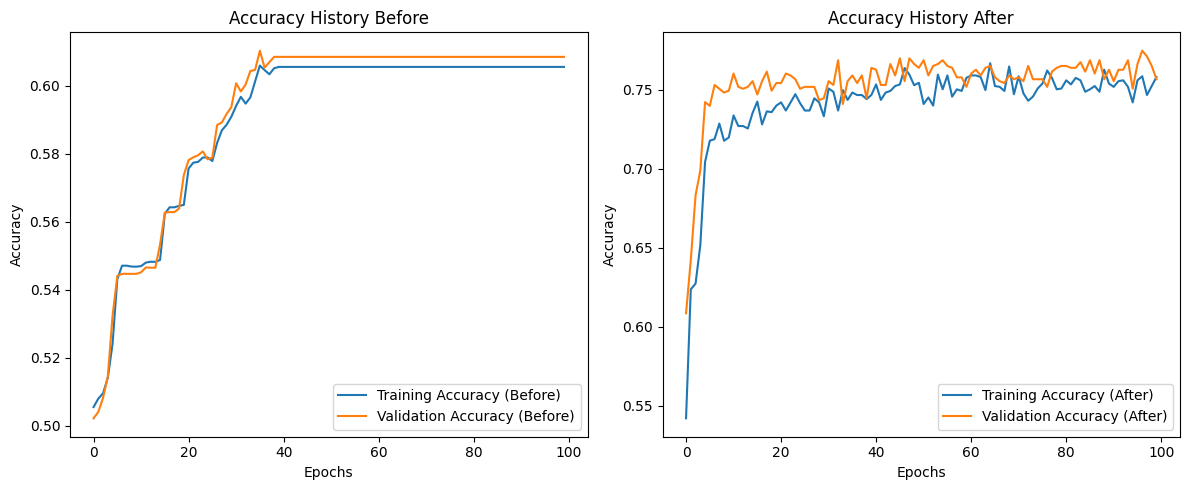

In [123]:
plot_accuracy_history_comparision(history_before=history_RNN_before, history_after=history_RNN_after)

- Accuracy sau khi áp dụng các phương pháp đã được cải thiện đáng kể, tuy nhiên vẫn chưa hoàn toàn giải quyết được tình trạng overfit triệt để do lượng data có giới hạn.